# Fix collinearity in social variables
We've seen [here](../data_processing/test_social_variable_collinearity.ipynb) that some of the variables are collinear, specifically language and {integrated verb use/media use}.

Let's try to get rid of the collinearity between variables!

1. Assess collinearity
    1. [Plot correlations](#Assess-collinearity:-plot-correlations)
    2. [Test VIF](#Test-VIF)
    3. [Test VIF (scalar vars only)](#VIF:-scalar-variables)
    4. [Test VIF (fewer vars)](#VIF:-fewer-variables)
2. Fix collinearity
    1. [Interactions](#Fix-collinearity:-add-interaction-terms-(continuous-variables))
    2. [Residual regression](#Fix-collinearity:-residual-regression)
    3. [Residual prediction](#Compare-variables-versus-residuals)

### Assess collinearity: plot correlations
Can we visually see which combinations are especially correlated? We'll test:

- language * location
- language * media

In [256]:
# loanword data first, all variables
from importlib import reload
import model_helpers
reload(model_helpers)
from model_helpers import load_clean_data
import pandas as pd
scalar_vars = ['log_es', 'log_balanced_latin_american_media_pct', 'log_integrated_verb_pct', 'log_post_pct', 'log_URL_share_pct', 'log_RT_pct']#["log_integrated_verb_pct","log_post_pct", "log_URL_share_pct", "log_RT_pct"]
# filter_vars = ['description_location_region', 'es_bin', 'balanced_latin_american_media_pct_bin', 'log_integrated_verb_pct', 'log_post_pct', 'log_URL_share_pct', 'log_RT_pct',]
filter_vars = ['es_bin', 'balanced_latin_american_media_pct_bin', 'log_integrated_verb_pct', 'log_post_pct', 'log_URL_share_pct', 'log_RT_pct',]
rare_control_vars = ['loanword', 'screen_name']
data_type = 'loanword'
loanword_post_social_data = load_clean_data('../../data/mined_tweets/loanword_verbs_post_social_data.tsv', filter_vars=filter_vars, scalar_vars=scalar_vars, rare_control_vars=rare_control_vars, data_type=data_type)
loanword_post_social_data.fillna('', inplace=True)
scalar_vars = ['integrated_verb_pct']
rare_control_vars = ['native_word_type', 'screen_name']
native_verb_post_social_data = load_clean_data('../../data/mined_tweets/native_verbs_post_social_data.tsv', filter_vars=filter_vars, scalar_vars=scalar_vars, rare_control_vars=rare_control_vars, data_type='native_verb')
author_social_data = pd.read_csv('../../data/mined_tweets/loanword_authors_combined_full_social_data.tsv', sep='\t')
author_social_data.fillna('', inplace=True)

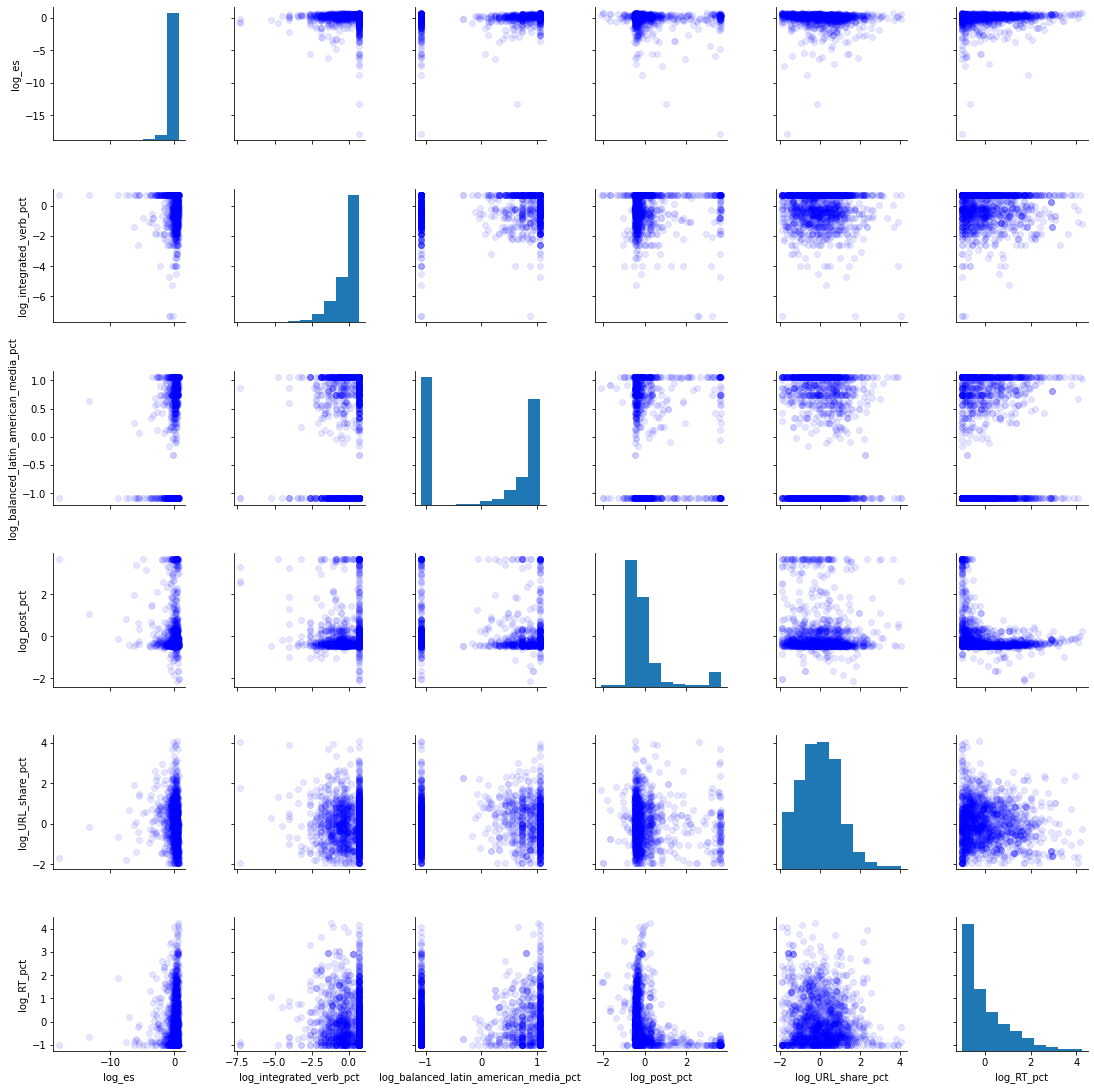

In [253]:
# visualize all scalar correlations to start
import seaborn as sns
from scipy.stats import spearmanr
scalar_vars = ['log_es', 'log_integrated_verb_pct', 'log_balanced_latin_american_media_pct', "log_post_pct", "log_URL_share_pct", "log_RT_pct"]
plot_data = loanword_post_social_data.loc[:, scalar_vars]
sns.pairplot(plot_data, plot_kws={'color':'blue', 'edgecolor':'blue', 'alpha':0.1})
plt.show()

In [259]:
# get correlations for scalar vars
from scipy.stats import pearsonr, spearmanr
for i, scalar_var_i in enumerate(scalar_vars):
    for j, scalar_var_j in enumerate(scalar_vars[(i+1):]):
        data_i_j = author_social_data[(author_social_data.loc[:, scalar_var_i]!='') &
                                      (author_social_data.loc[:, scalar_var_j]!='')]
        correl, p_val = pearsonr(data_i_j.loc[:, scalar_var_i], data_i_j.loc[:, scalar_var_j])
#         correl, p_val = spearmanr(data_i_j.loc[:, scalar_var_i], data_i_j.loc[:, scalar_var_j])
        print(f'{scalar_var_i} vs. {scalar_var_j} has correl=%.3f (p=%.3E)'%(correl, p_val))

log_es vs. log_integrated_verb_pct has correl=-0.014 (p=1.084E-02)
log_es vs. log_balanced_latin_american_media_pct has correl=0.113 (p=1.213E-05)
log_es vs. log_post_pct has correl=-0.341 (p=0.000E+00)
log_es vs. log_URL_share_pct has correl=-0.277 (p=0.000E+00)
log_es vs. log_RT_pct has correl=0.217 (p=0.000E+00)
log_integrated_verb_pct vs. log_balanced_latin_american_media_pct has correl=0.015 (p=5.634E-01)
log_integrated_verb_pct vs. log_post_pct has correl=0.043 (p=3.209E-15)
log_integrated_verb_pct vs. log_URL_share_pct has correl=0.035 (p=1.902E-10)
log_integrated_verb_pct vs. log_RT_pct has correl=-0.030 (p=3.353E-08)
log_balanced_latin_american_media_pct vs. log_post_pct has correl=-0.027 (p=3.011E-01)
log_balanced_latin_american_media_pct vs. log_URL_share_pct has correl=-0.009 (p=7.289E-01)
log_balanced_latin_american_media_pct vs. log_RT_pct has correl=0.004 (p=8.725E-01)
log_post_pct vs. log_URL_share_pct has correl=0.466 (p=0.000E+00)
log_post_pct vs. log_RT_pct has corre

OK! 

- language has strong correlation with {integrated verb use, media sharing, URL sharing}
- integrated verb use has strong correlation with {post activity, URL sharing, RT sharing}
- activity has strong correlations with {URL sharing, RT sharing}

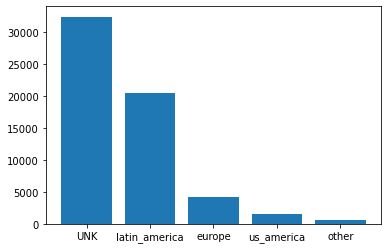

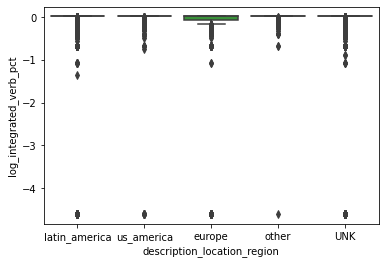

/hg190/istewart6/miniconda3/envs/py3/lib/python3.6/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


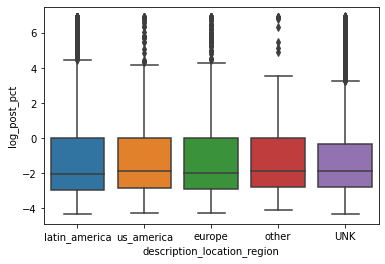

/hg190/istewart6/miniconda3/envs/py3/lib/python3.6/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


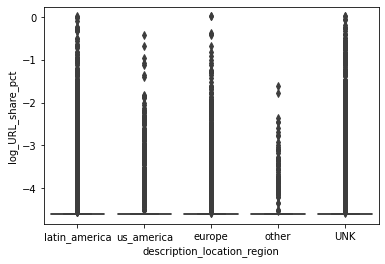

/hg190/istewart6/miniconda3/envs/py3/lib/python3.6/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


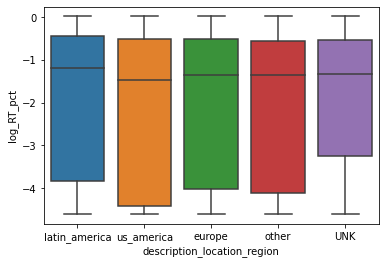

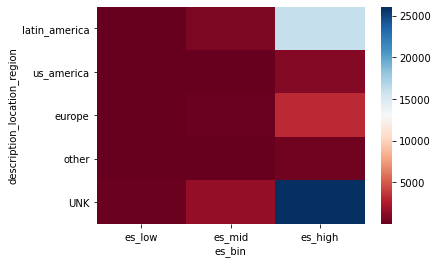

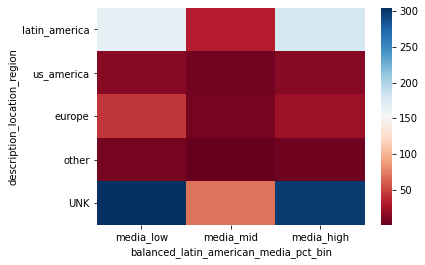

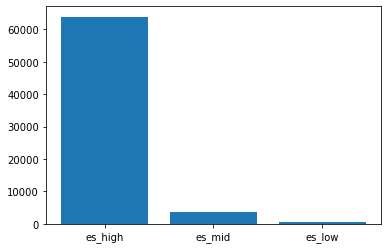

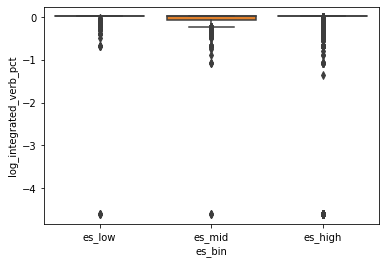

/hg190/istewart6/miniconda3/envs/py3/lib/python3.6/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


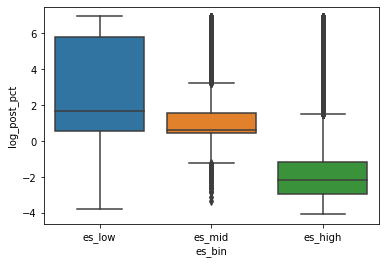

/hg190/istewart6/miniconda3/envs/py3/lib/python3.6/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


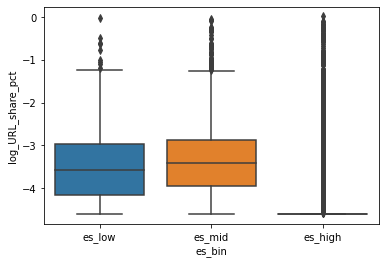

/hg190/istewart6/miniconda3/envs/py3/lib/python3.6/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


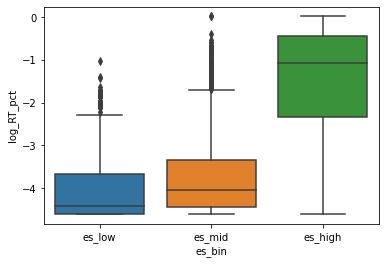

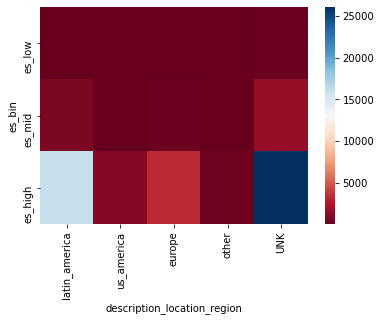

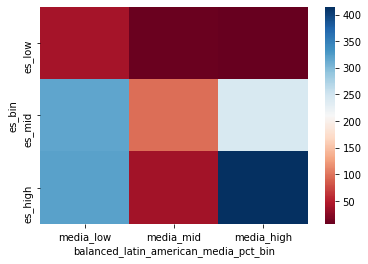

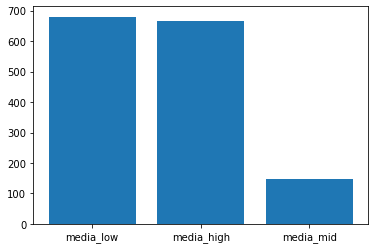

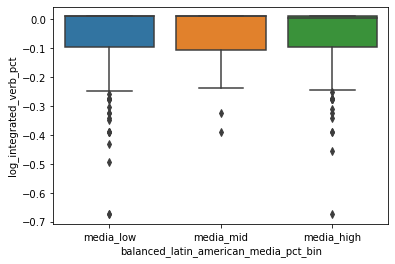

/hg190/istewart6/miniconda3/envs/py3/lib/python3.6/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


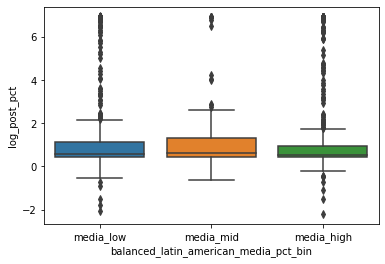

/hg190/istewart6/miniconda3/envs/py3/lib/python3.6/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


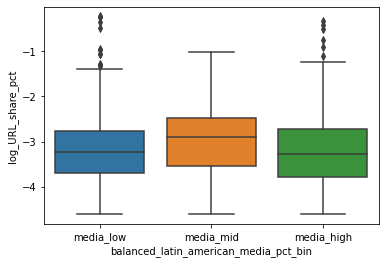

/hg190/istewart6/miniconda3/envs/py3/lib/python3.6/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


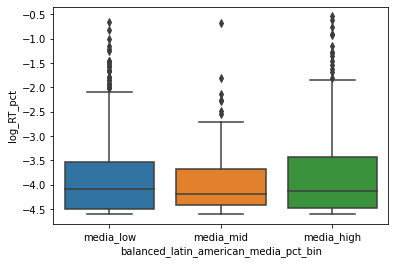

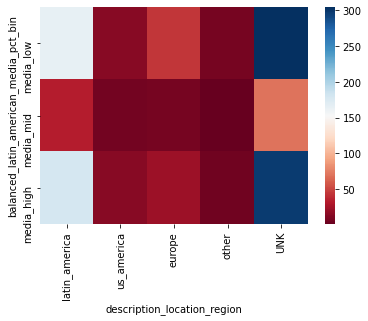

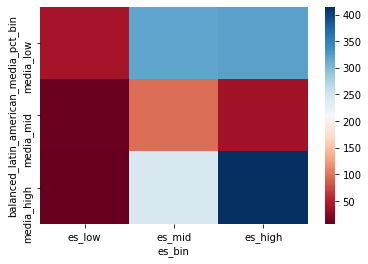

In [294]:
# same thing but categorical variables
cat_vars = ['description_location_region', 'es_bin', 'balanced_latin_american_media_pct_bin']
test_vars = ['log_integrated_verb_pct', "log_post_pct", "log_URL_share_pct", "log_RT_pct"] + cat_vars
cat_vars_ordered = {
    'es_bin' : ['es_low', 'es_mid', 'es_high'],
    'balanced_latin_american_media_pct_bin' : ['media_low', 'media_mid', 'media_high'],
    'description_location_region' : ['latin_america', 'us_america', 'europe', 'other', 'UNK']
}
for cat_var_i in cat_vars:
    test_vars_i = list(filter(lambda x: x!=cat_var_i, test_vars))
    cat_var_counts = author_social_data[author_social_data.loc[:, cat_var_i]!=''].loc[:, cat_var_i].value_counts()
    plt.bar(cat_var_counts.index, cat_var_counts)
    plt.show()
    for test_var_j in test_vars_i:
        data_i_j = author_social_data[(author_social_data.loc[:, cat_var_i]!='')&
                                      (author_social_data.loc[:, test_var_j]!='')]
        # heatmap for categorical variables
        if(test_var_j in cat_vars):
#             data_i = author_social_data.groupby([cat_var_i, test_var_i]).apply(lambda x: x.shape[0]).reset_index().rename(columns={0:'count'})
#             data_i = pd.pivot(data_i, index=cat_var_i, columns=test_var_i, values=['count']).fillna(0, inplace=False)
#             data_i.columns = data_i.columns.droplevel()
            counts_i_j = pd.crosstab(data_i_j.loc[:, cat_var_i], data_i_j.loc[:, test_var_j])
            if(cat_var_i in cat_vars_ordered):
                counts_i_j = counts_i_j.loc[:, cat_vars_ordered[test_var_j]]
            if(test_var_j in cat_vars_ordered):
                counts_i_j = counts_i_j.loc[cat_vars_ordered[cat_var_i], :]
            sns.heatmap(counts_i_j, cmap='RdBu')
        # scatter plot for scalar variables
        else:
            col_order = cat_vars_ordered[cat_var_i]
            data_i_j = data_i_j.assign(**{
                test_var_j : data_i_j.loc[:, test_var_j].astype(float)
            })
#             sns.catplot(x=cat_var_i, y=test_var_j, data=data_i_j, alpha=0.05, col_order=col_order)
            sns.boxplot(x=cat_var_i, y=test_var_j, data=data_i_j, order=col_order)
        plt.show()

In [295]:
# get correlations for categorical vars
from scipy.stats import chi2_contingency, kruskal
# categorical-categorical
p_val_upper = 0.05 / (len(cat_vars) * (len(cat_vars)-1))
print('testing cat var vs. cat var')
for i, cat_var_i in enumerate(cat_vars):
    for j, cat_var_j in enumerate(cat_vars[(i+1):]):
        data_i_j = author_social_data[(author_social_data.loc[:, cat_var_i]!='')&
                                      (author_social_data.loc[:, cat_var_j]!='')]
        contingency_table = pd.crosstab(data_i_j.loc[:, cat_var_i], data_i_j.loc[:, cat_var_j])
        test_stat, p_val, dof, expected = chi2_contingency(contingency_table)
        if(p_val < p_val_upper):
            print(f'{cat_var_i} vs. {cat_var_j}: test stat = %.3f (p=%.3E)'%(test_stat, p_val))
# categorical-scalar
print('testing cat var vs. scalar var')
p_val_upper = 0.05 / (len(cat_vars) * len(scalar_vars))
for i, cat_var_i in enumerate(cat_vars):
    for j, scalar_var_j in enumerate(scalar_vars):
        data_i_j = author_social_data[(author_social_data.loc[:, cat_var_i]!='')&
                                      (author_social_data.loc[:, scalar_var_j]!='')]
        data_dists_i_j = list(data_i_j.groupby(cat_var_i).apply(lambda x: x.loc[:, scalar_var_j].values))
        test_stat, p_val = kruskal(*data_dists_i_j)
        if(p_val < p_val_upper):
            print(f'{cat_var_i} vs. {scalar_var_j}: test stat = %.3f (p=%.3E)'%(test_stat, p_val))

testing cat var vs. cat var
description_location_region vs. es_bin: test stat = 87.452 (p=1.528E-15)
es_bin vs. balanced_latin_american_media_pct_bin: test stat = 84.881 (p=1.608E-17)
testing cat var vs. scalar var
description_location_region vs. log_es: test stat = 20.433 (p=4.101E-04)
description_location_region vs. log_integrated_verb_pct: test stat = 93.397 (p=2.498E-19)


/hg190/istewart6/miniconda3/envs/py3/lib/python3.6/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


description_location_region vs. log_post_pct: test stat = 69.542 (p=2.836E-14)
description_location_region vs. log_RT_pct: test stat = 39.878 (p=4.587E-08)
es_bin vs. log_es: test stat = 28003.724 (p=0.000E+00)
es_bin vs. log_integrated_verb_pct: test stat = 444.401 (p=3.158E-97)
es_bin vs. log_balanced_latin_american_media_pct: test stat = 46.196 (p=9.302E-11)
es_bin vs. log_post_pct: test stat = 8634.318 (p=0.000E+00)
es_bin vs. log_URL_share_pct: test stat = 20318.488 (p=0.000E+00)
es_bin vs. log_RT_pct: test stat = 5873.166 (p=0.000E+00)
balanced_latin_american_media_pct_bin vs. log_es: test stat = 95.517 (p=1.814E-21)
balanced_latin_american_media_pct_bin vs. log_balanced_latin_american_media_pct: test stat = 1375.757 (p=1.812E-299)
balanced_latin_american_media_pct_bin vs. log_URL_share_pct: test stat = 13.850 (p=9.828E-04)


- language has correlation with {media sharing, region, URL sharing}
- region has correlation with {integrated verb use, activity}
- media sharing has correlation with {language, URL sharing}

### Test VIF
Before changing the model, let's see first if the VIF for language use is especially high.

We'll do this for all variables to start, and then remove variables as needed.

In [14]:
from importlib import reload
import model_helpers
reload(model_helpers)
from model_helpers import load_clean_data
filter_vars=['es_bin', 'description_location_region', 'integrated_verb_pct', 'balanced_latin_american_media_pct']
scalar_vars = ['integrated_verb_pct']
rare_control_vars = ['loanword', 'screen_name']
loanword_post_social_data = load_clean_data('../../data/mined_tweets/loanword_verbs_post_social_data.tsv', filter_vars=filter_vars, scalar_vars=scalar_vars, rare_control_vars=rare_control_vars, data_type='loanword')
scalar_vars = ['integrated_verb_pct']
rare_control_vars = ['native_word_type', 'screen_name']
native_verb_post_social_data = load_clean_data('../../data/mined_tweets/native_verbs_post_social_data.tsv', filter_vars=filter_vars, scalar_vars=scalar_vars, rare_control_vars=rare_control_vars, data_type='native_verb')

/hg190/istewart6/miniconda3/envs/py3/lib/python3.6/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [9]:
from model_helpers import run_regularized_regression
dep_var = 'has_light_verb'
cat_vars = ['freq_loanword', 'freq_screen_name', 'es_bin', 'description_location_region', 'latin_american_media_pct_bin']
cat_var_treatment_vals = ['RARE', 'RARE', 'es_low', 'other', 'media_low']
scalar_vars = ['log_integrated_verb_pct']
model, model_results = run_regularized_regression(loanword_post_social_data, dep_var, scalar_vars=scalar_vars, cat_vars=cat_vars, cat_var_treatment_vals=cat_var_treatment_vals, l2_weight=0.1, max_iter=300, verbose=False)
display(model_results.loc[list(filter(lambda x: 'freq_loanword' not in x and 'freq_screen_name' not in x, model_results.index.values)), :])
# only significant results
p_val_upper = 0.05
display(model_results[model_results.loc[:, 'p'] <= p_val_upper])

,mean,SE,Z,p,CI_lower,CI_upper
Intercept,-0.295459,0.419351,-0.704563,0.619606,-1.117372,0.526454
"C(es_bin, Treatment(""es_low""))[T.es_high]",-0.297167,0.325627,-0.912598,0.404938,-0.935384,0.341051
"C(es_bin, Treatment(""es_low""))[T.es_mid]",-0.004945,0.336144,-0.014710,0.999827,-0.663774,0.653885
"C(description_location_region, Treatment(""other""))[T.europe]",-0.009727,0.116989,-0.083148,0.994484,-0.239022,0.219568
"C(description_location_region, Treatment(""other""))[T.latin_america]",-0.099827,0.068555,-1.456146,0.033976,-0.234192,0.034539
"C(description_location_region, Treatment(""other""))[T.us_america]",-0.011809,0.184000,-0.064178,0.996714,-0.372441,0.348824
"C(latin_american_media_pct_bin, Treatment(""media_low""))[T.media_high]",-0.039022,0.080330,-0.485773,0.813452,-0.196465,0.118421
"C(latin_american_media_pct_bin, Treatment(""media_low""))[T.media_mid]",-0.078803,0.076636,-1.028283,0.290345,-0.229007,0.071400
log_integrated_verb_pct,0.001225,0.029692,0.041250,0.998642,-0.056971,0.059420


,mean,SE,Z,p,CI_lower,CI_upper
"C(description_location_region, Treatment(""other""))[T.latin_america]",-0.099827,0.068555,-1.456146,0.033976,-0.234192,0.034539


In [11]:
from model_helpers import compute_VIF
test_vars = ['es_bin', 'description_location_region', 'integrated_verb_pct_bin', 'latin_american_media_pct_bin']
for var_name in test_vars:    
    var_params = list(filter(lambda x: var_name in x, model_results.index))
    for var_param in var_params:
        var_vif = compute_VIF(model, var_param)
        print('param={%s} has VIF=%.3f'%(var_param, var_vif))

param={C(es_bin, Treatment("es_low"))[T.es_high]} has VIF=12.589
param={C(es_bin, Treatment("es_low"))[T.es_mid]} has VIF=12.535
param={C(description_location_region, Treatment("other"))[T.europe]} has VIF=1.142
param={C(description_location_region, Treatment("other"))[T.latin_america]} has VIF=1.135
param={C(description_location_region, Treatment("other"))[T.us_america]} has VIF=1.048
param={C(latin_american_media_pct_bin, Treatment("media_low"))[T.media_high]} has VIF=1.114
param={C(latin_american_media_pct_bin, Treatment("media_low"))[T.media_mid]} has VIF=1.138


Wow these are bad. Usually VIF should be below 3, so the language variables clearly have a strong correlation.

Does this apply to the native verb data too?

In [12]:
from model_helpers import run_regularized_regression
dep_var = 'has_light_verb'
cat_vars = ['freq_native_word_type', 'freq_screen_name', 'es_bin', 'description_location_region', 'latin_american_media_pct_bin']
cat_var_treatment_vals = ['RARE', 'RARE', 'es_low', 'other', 'media_low']
scalar_vars = []
model, model_results = run_regularized_regression(native_verb_post_social_data, dep_var, scalar_vars=scalar_vars, cat_vars=cat_vars, cat_var_treatment_vals=cat_var_treatment_vals, l2_weight=0.1, max_iter=300, verbose=False)
display(model_results.loc[list(filter(lambda x: 'freq_native_word_type' not in x and 'freq_screen_name' not in x, model_results.index.values)), :])
# only significant results
p_val_upper = 0.05
display(model_results[model_results.loc[:, 'p'] <= p_val_upper])

,mean,SE,Z,p,CI_lower,CI_upper
Intercept,-0.899629,1.390368,-0.647043,0.675461,-3.624700,1.825443
"C(es_bin, Treatment(""es_low""))[T.es_high]",-0.796196,0.411152,-1.936500,0.000177,-1.602040,0.009647
"C(es_bin, Treatment(""es_low""))[T.es_mid]",-0.101910,0.402922,-0.252928,0.948992,-0.891622,0.687802
"C(description_location_region, Treatment(""other""))[T.europe]",-0.053426,0.435343,-0.122722,0.987984,-0.906683,0.799830
"C(description_location_region, Treatment(""other""))[T.latin_america]",-0.250013,0.302611,-0.826188,0.494868,-0.843119,0.343092
"C(description_location_region, Treatment(""other""))[T.us_america]",-0.021880,0.794977,-0.027522,0.999396,-1.580005,1.536246
"C(latin_american_media_pct_bin, Treatment(""media_low""))[T.media_high]",-0.142587,0.364412,-0.391280,0.878319,-0.856821,0.571647
"C(latin_american_media_pct_bin, Treatment(""media_low""))[T.media_mid]",-0.175397,0.487662,-0.359669,0.897071,-1.131196,0.780403


,mean,SE,Z,p,CI_lower,CI_upper
"C(es_bin, Treatment(""es_low""))[T.es_high]",-0.796196,0.411152,-1.9365,0.000177,-1.60204,0.009647


In [13]:
# compute VIF for language variable
test_vars = ['es_bin', 'description_location_region', 'latin_american_media_pct_bin']
for var_name in test_vars:    
    var_params = list(filter(lambda x: var_name in x, model_results.index))
    for var_param in var_params:
        var_vif = compute_VIF(model, var_param)
        print('param={%s} has VIF=%.3f'%(var_param, var_vif))

param={C(es_bin, Treatment("es_low"))[T.es_high]} has VIF=127.820
param={C(es_bin, Treatment("es_low"))[T.es_mid]} has VIF=139.950
param={C(description_location_region, Treatment("other"))[T.europe]} has VIF=144.234
param={C(description_location_region, Treatment("other"))[T.latin_america]} has VIF=231.605
param={C(description_location_region, Treatment("other"))[T.us_america]} has VIF=113.957
param={C(latin_american_media_pct_bin, Treatment("media_low"))[T.media_high]} has VIF=202.716
param={C(latin_american_media_pct_bin, Treatment("media_low"))[T.media_mid]} has VIF=386.968


### VIF: scalar variables

Do we see high collinearity with the scalar variables, too? 

In [15]:
# loanwords
dep_var = 'has_light_verb'
cat_vars = ['freq_loanword', 'freq_screen_name', 'description_location_region']
cat_var_treatment_vals = ['RARE', 'RARE', 'other']
scalar_vars = ['log_integrated_verb_pct', 'log_es', 'log_latin_american_media_pct']
model, model_results = run_regularized_regression(loanword_post_social_data, dep_var, scalar_vars=scalar_vars, cat_vars=cat_vars, cat_var_treatment_vals=cat_var_treatment_vals, l2_weight=0.1, max_iter=300, verbose=False)
display(model_results.loc[list(filter(lambda x: 'freq_loanword' not in x and 'freq_screen_name' not in x, model_results.index.values)), :])
# only significant results
p_val_upper = 0.05
display(model_results[model_results.loc[:, 'p'] <= p_val_upper])

,mean,SE,Z,p,CI_lower,CI_upper
Intercept,-0.487753,0.258070,-1.890001,0.000354,-0.993562,0.018055
"C(description_location_region, Treatment(""other""))[T.europe]",-0.023715,0.114006,-0.208019,0.965485,-0.247162,0.199731
"C(description_location_region, Treatment(""other""))[T.latin_america]",-0.138037,0.067017,-2.059718,0.000022,-0.269388,-0.006685
"C(description_location_region, Treatment(""other""))[T.us_america]",-0.017597,0.178589,-0.098535,0.992253,-0.367625,0.332431
log_integrated_verb_pct,-0.000595,0.028759,-0.020677,0.999659,-0.056960,0.055771
log_es,-0.113943,0.026809,-4.250122,0.000000,-0.166488,-0.061398
log_latin_american_media_pct,-0.015284,0.029907,-0.511053,0.793957,-0.073900,0.043332


,mean,SE,Z,p,CI_lower,CI_upper
Intercept,-0.487753,0.258070,-1.890001,0.000354,-0.993562,0.018055
"C(description_location_region, Treatment(""other""))[T.latin_america]",-0.138037,0.067017,-2.059718,0.000022,-0.269388,-0.006685
log_es,-0.113943,0.026809,-4.250122,0.000000,-0.166488,-0.061398


In [16]:
from model_helpers import compute_VIF
test_vars = ['log_es', 'description_location_region', 'log_integrated_verb_pct', 'log_latin_american_media_pct']
for var_name in test_vars:    
    var_params = list(filter(lambda x: var_name in x, model_results.index))
    for var_param in var_params:
        var_vif = compute_VIF(model, var_param)
        print('param={%s} has VIF=%.3f'%(var_param, var_vif))

param={log_es} has VIF=1.087
param={C(description_location_region, Treatment("other"))[T.europe]} has VIF=1.141
param={C(description_location_region, Treatment("other"))[T.latin_america]} has VIF=1.135
param={C(description_location_region, Treatment("other"))[T.us_america]} has VIF=1.047
param={log_integrated_verb_pct} has VIF=1.043
param={log_latin_american_media_pct} has VIF=1.066


OK! So even though the variable might be non-linear in effect, it may make more sense to use the linear value to avoid collinearity.

In [20]:
# native verbs
dep_var = 'has_light_verb'
cat_vars = ['freq_native_word_type', 'freq_screen_name', 'description_location_region']
cat_var_treatment_vals = ['RARE', 'RARE', 'other']
scalar_vars = ['log_es', 'log_latin_american_media_pct']
model, model_results = run_regularized_regression(native_verb_post_social_data, dep_var, scalar_vars=scalar_vars, cat_vars=cat_vars, cat_var_treatment_vals=cat_var_treatment_vals, l2_weight=0.1, max_iter=300, verbose=False)
display(model_results.loc[list(filter(lambda x: 'freq_native_word_type' not in x and 'freq_screen_name' not in x, model_results.index.values)), :])
# only significant results
p_val_upper = 0.05
display(model_results[model_results.loc[:, 'p'] <= p_val_upper])

,mean,SE,Z,p,CI_lower,CI_upper
Intercept,-1.324342,1.165648,-1.136143,0.196766,-3.608970,0.960285
"C(description_location_region, Treatment(""other""))[T.europe]",-0.083348,0.424941,-0.196140,0.969312,-0.916216,0.749521
"C(description_location_region, Treatment(""other""))[T.latin_america]",-0.352389,0.302411,-1.165266,0.174513,-0.945103,0.240325
"C(description_location_region, Treatment(""other""))[T.us_america]",-0.028792,0.671692,-0.042865,0.998534,-1.345285,1.287701
log_es,0.013617,0.048438,0.281115,0.937012,-0.081320,0.108553
log_latin_american_media_pct,0.007437,0.126205,0.058929,0.997229,-0.239920,0.254794


,mean,SE,Z,p,CI_lower,CI_upper


In [22]:
test_vars = ['log_es', 'description_location_region', 'log_latin_american_media_pct']
for var_name in test_vars:    
    var_params = list(filter(lambda x: var_name in x, model_results.index))
    for var_param in var_params:
        try:
            var_vif = compute_VIF(model, var_param)
            print('param={%s} has VIF=%.3f'%(var_param, var_vif))
        except Exception as e:
            print('param={%s} failed to compute VIF because %s'%(var_param, e))

param={log_es} has VIF=27.116
param={C(description_location_region, Treatment("other"))[T.europe]} has VIF=143.903
param={C(description_location_region, Treatment("other"))[T.latin_america]} has VIF=227.734
param={C(description_location_region, Treatment("other"))[T.us_america]} failed to compute VIF because SVD did not converge
param={log_latin_american_media_pct} has VIF=197.884


Wow! VIF scores are really bad for all variables in the native verb data even though we found previously that the collinearity between all variables in the native verb data wasn't terrible.

### VIF: fewer variables
What if we look at the data subset with the more dense variables?

In [1]:
from importlib import reload
import model_helpers
reload(model_helpers)
from model_helpers import load_clean_data
filter_vars=['es_bin', 'description_location_region', 'integrated_verb_pct']
scalar_vars = ['integrated_verb_pct']
rare_control_vars = ['loanword', 'screen_name']
loanword_post_social_data = load_clean_data('../../data/mined_tweets/loanword_verbs_post_social_data.tsv', filter_vars=filter_vars, scalar_vars=scalar_vars, rare_control_vars=rare_control_vars, data_type='loanword')
scalar_vars = ['integrated_verb_pct']
rare_control_vars = ['native_word_type', 'screen_name']
native_verb_post_social_data = load_clean_data('../../data/mined_tweets/native_verbs_post_social_data.tsv', filter_vars=filter_vars, scalar_vars=scalar_vars, rare_control_vars=rare_control_vars, data_type='native_verb')

/nethome/istewart6/.local/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/hg190/istewart6/miniconda3/envs/py3/lib/python3.6/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [46]:
# loanwords
dep_var = 'has_light_verb'
cat_vars = ['freq_loanword', 'freq_screen_name', 'es_bin', 'description_location_region']
cat_var_treatment_vals = ['RARE', 'RARE', 'es_low', 'other']
scalar_vars = ['log_integrated_verb_pct']
model, model_results = run_regularized_regression(loanword_post_social_data, dep_var, scalar_vars=scalar_vars, cat_vars=cat_vars, cat_var_treatment_vals=cat_var_treatment_vals, l2_weight=0.1, max_iter=300, verbose=False)
display(model_results.loc[list(filter(lambda x: 'freq_loanword' not in x and 'freq_screen_name' not in x, model_results.index.values)), :])
test_vars = ['es_bin', 'description_location_region', 'log_integrated_verb_pct']
for var_name in test_vars:    
    var_params = list(filter(lambda x: var_name in x, model_results.index))
    for var_param in var_params:
        var_vif = compute_VIF(model, var_param)
        print('param={%s} has VIF=%.3f'%(var_param, var_vif))

,mean,SE,Z,p,CI_lower,CI_upper
Intercept,-0.414488,0.413182,-1.003161,3.142562e-01,-1.224309,0.395334
"C(es_bin, Treatment(""es_low""))[T.es_high]",-0.428754,0.195183,-2.196674,1.397391e-06,-0.811307,-0.046202
"C(es_bin, Treatment(""es_low""))[T.es_mid]",0.012383,0.204924,0.060429,9.970864e-01,-0.389260,0.414027
"C(description_location_region, Treatment(""other""))[T.europe]",-0.060658,0.045450,-1.334622,7.487719e-02,-0.149739,0.028422
"C(description_location_region, Treatment(""other""))[T.latin_america]",-0.090505,0.024947,-3.627899,0.000000e+00,-0.139400,-0.041610
"C(description_location_region, Treatment(""other""))[T.us_america]",-0.014223,0.070025,-0.203120,9.670905e-01,-0.151470,0.123023
log_integrated_verb_pct,-0.026237,0.010586,-2.478431,8.117164e-10,-0.046985,-0.005488


param={C(es_bin, Treatment("es_low"))[T.es_high]} has VIF=10.089
param={C(es_bin, Treatment("es_low"))[T.es_mid]} has VIF=10.074
param={C(description_location_region, Treatment("other"))[T.europe]} has VIF=1.261
param={C(description_location_region, Treatment("other"))[T.latin_america]} has VIF=1.166
param={C(description_location_region, Treatment("other"))[T.us_america]} has VIF=1.048
param={log_integrated_verb_pct} has VIF=1.045


Loanword data still has high VIF for the language variable.

TODO: why does this never finish executing??

In [ ]:
%%capture vif_output
from model_helpers import run_regularized_regression, compute_VIF
dep_var = 'has_light_verb'
cat_vars = ['freq_native_word_type', 'freq_screen_name', 'es_bin', 'description_location_region']
default_native_word_type_val = native_verb_post_social_data.loc[:, 'freq_native_word_type'].value_counts().index[0]
cat_var_treatment_vals = [default_native_word_type_val, 'RARE', 'es_low', 'other']
scalar_vars = []
model, model_results = run_regularized_regression(native_verb_post_social_data, dep_var, scalar_vars=scalar_vars, cat_vars=cat_vars, cat_var_treatment_vals=cat_var_treatment_vals, l2_weight=0.1, max_iter=300, verbose=False)
display(model_results.loc[list(filter(lambda x: 'freq_native_word_type' not in x and 'freq_screen_name' not in x, model_results.index.values)), :])
# compute VIF for language variable
test_vars = ['es_bin', 'description_location_region']
for var_name in test_vars:    
    var_params = list(filter(lambda x: var_name in x, model_results.index))
    for var_param in var_params:
        var_vif = compute_VIF(model, var_param)
        print('param={%s} has VIF=%.3f'%(var_param, var_vif))

### Fix collinearity: add interaction terms (continuous variables)

First step to fix collinearity: let's add interaction terms for the known problem variable, i.e. language x {media shares/integrated verb use}.

In [23]:
# loanword data first, all variables
from model_helpers import load_clean_data
filter_vars=['es_bin', 'description_location_region', 'integrated_verb_pct', 'latin_american_media_pct']
scalar_vars = ['integrated_verb_pct']
rare_control_vars = ['loanword', 'screen_name']
loanword_post_social_data = load_clean_data('../../data/mined_tweets/loanword_verbs_post_social_data.tsv', filter_vars=filter_vars, scalar_vars=scalar_vars, rare_control_vars=rare_control_vars, data_type='loanword')
scalar_vars = ['integrated_verb_pct']
rare_control_vars = ['native_word_type', 'screen_name']
native_verb_post_social_data = load_clean_data('../../data/mined_tweets/native_verbs_post_social_data.tsv', filter_vars=filter_vars, scalar_vars=scalar_vars, rare_control_vars=rare_control_vars, data_type='native_verb')

/hg190/istewart6/miniconda3/envs/py3/lib/python3.6/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [35]:
from importlib import reload
import model_helpers
reload(model_helpers)
from model_helpers import run_regularized_regression
interaction_var_pairs = [
#     ['es_bin', 'latin_american_media_pct_bin', 'categorical'], 
    [['log_es', 'log_integrated_verb_pct', 'scalar']],
    [['log_es', 'log_latin_american_media_pct', 'scalar']],
    [['log_es', 'log_integrated_verb_pct', 'scalar'], ['log_es', 'log_latin_american_media_pct', 'scalar']],
]
for interaction_vars in interaction_var_pairs:
    print('testing interaction vars %s'%(str(interaction_vars)))
    dep_var = 'has_light_verb'
    cat_vars = ['freq_loanword', 'freq_screen_name', 'description_location_region', 'latin_american_media_pct_bin']
    cat_var_treatment_vals = ['RARE', 'RARE', 'other', 'media_low']
    scalar_vars = ['log_es', 'log_integrated_verb_pct']
    model, model_results = run_regularized_regression(loanword_post_social_data, dep_var, 
                                                      scalar_vars=scalar_vars, 
                                                      cat_vars=cat_vars, cat_var_treatment_vals=cat_var_treatment_vals, 
                                                      interaction_var_pairs=interaction_vars, 
                                                      l2_weight=0.1, max_iter=300, verbose=False)
    display(model_results.loc[list(filter(lambda x: 'freq_loanword' not in x and 'freq_screen_name' not in x, model_results.index.values)), :])

testing interaction vars [['log_es', 'log_integrated_verb_pct', 'scalar']]


,mean,SE,Z,p,CI_lower,CI_upper
Intercept,-0.466068,0.260130,-1.791677,0.001327,-0.975913,0.043777
"C(description_location_region, Treatment(""other""))[T.europe]",-0.022786,0.114278,-0.199388,0.968288,-0.246767,0.201195
"C(description_location_region, Treatment(""other""))[T.latin_america]",-0.133018,0.067203,-1.979342,0.000089,-0.264733,-0.001302
"C(description_location_region, Treatment(""other""))[T.us_america]",-0.017367,0.178866,-0.097095,0.992478,-0.367937,0.333203
"C(latin_american_media_pct_bin, Treatment(""media_low""))[T.media_high]",-0.058169,0.079469,-0.731969,0.592111,-0.213926,0.097588
"C(latin_american_media_pct_bin, Treatment(""media_low""))[T.media_mid]",-0.103760,0.075384,-1.376417,0.058155,-0.251510,0.043990
log_es,-0.110417,0.026982,-4.092192,0.000000,-0.163302,-0.057533
log_integrated_verb_pct,-0.003382,0.030693,-0.110196,0.990311,-0.063540,0.056776
log_es:log_integrated_verb_pct,-0.008355,0.017537,-0.476453,0.820418,-0.042727,0.026016


testing interaction vars [['log_es', 'log_latin_american_media_pct', 'scalar']]


,mean,SE,Z,p,CI_lower,CI_upper
Intercept,-0.462246,0.279658,-1.652899,0.006294,-1.010366,0.085873
"C(description_location_region, Treatment(""other""))[T.europe]",-0.022334,0.114385,-0.195248,0.969591,-0.246525,0.201858
"C(description_location_region, Treatment(""other""))[T.latin_america]",-0.132081,0.067377,-1.960345,0.000122,-0.264137,-0.000026
"C(description_location_region, Treatment(""other""))[T.us_america]",-0.017857,0.179197,-0.099649,0.992077,-0.369077,0.333363
"C(latin_american_media_pct_bin, Treatment(""media_low""))[T.media_high]",-0.059216,0.347823,-0.170246,0.976877,-0.740935,0.622504
"C(latin_american_media_pct_bin, Treatment(""media_low""))[T.media_mid]",-0.104866,0.168092,-0.623862,0.697125,-0.434321,0.224588
log_es,-0.118775,0.030033,-3.954815,0.000000,-0.177638,-0.059911
log_integrated_verb_pct,0.000007,0.028889,0.000245,1.000000,-0.056615,0.056629
log_latin_american_media_pct,0.007753,0.133982,0.057866,0.997328,-0.254848,0.270354
log_es:log_latin_american_media_pct,-0.028941,0.033004,-0.876911,0.441910,-0.093628,0.035745


testing interaction vars [['log_es', 'log_integrated_verb_pct', 'scalar'], ['log_es', 'log_latin_american_media_pct', 'scalar']]


,mean,SE,Z,p,CI_lower,CI_upper
Intercept,-0.462459,0.279638,-1.653776,0.006239,-1.010539,0.085622
"C(description_location_region, Treatment(""other""))[T.europe]",-0.022386,0.114372,-0.195729,0.969441,-0.246550,0.201778
"C(description_location_region, Treatment(""other""))[T.latin_america]",-0.132047,0.067379,-1.959779,0.000123,-0.264107,0.000012
"C(description_location_region, Treatment(""other""))[T.us_america]",-0.017915,0.179179,-0.099983,0.992024,-0.369098,0.333269
"C(latin_american_media_pct_bin, Treatment(""media_low""))[T.media_high]",-0.059223,0.347863,-0.170249,0.976877,-0.741021,0.622575
"C(latin_american_media_pct_bin, Treatment(""media_low""))[T.media_mid]",-0.104794,0.168113,-0.623352,0.697596,-0.434289,0.224702
log_es,-0.118725,0.030056,-3.950098,0.000000,-0.177635,-0.059816
log_integrated_verb_pct,-0.003128,0.030706,-0.101880,0.991718,-0.063311,0.057054
log_es:log_integrated_verb_pct,-0.009329,0.017927,-0.520409,0.786525,-0.044466,0.025807
log_latin_american_media_pct,0.008092,0.134026,0.060377,0.997091,-0.254594,0.270778


It looks like no matter what interaction pair we use, we always see that language and location (Latin America) constitute most of the effect size.

Native verbs.

In [38]:
# scalar vars
interaction_vars = [['log_es', 'log_latin_american_media_pct', 'scalar']]
print('testing interaction vars %s'%(str(interaction_vars)))
dep_var = 'has_light_verb'
cat_vars = ['freq_native_word_type', 'freq_screen_name', 'description_location_region']
cat_var_treatment_vals = ['RARE', 'RARE', 'other']
scalar_vars = ['log_es', 'log_latin_american_media_pct']
model, model_results = run_regularized_regression(native_verb_post_social_data, dep_var, 
                                                  scalar_vars=scalar_vars, 
                                                  cat_vars=cat_vars, cat_var_treatment_vals=cat_var_treatment_vals, 
                                                  interaction_var_pairs=interaction_vars, 
                                                  l2_weight=0.1, max_iter=300, verbose=False)
display(model_results.loc[list(filter(lambda x: 'freq_native_word_type' not in x and 'freq_screen_name' not in x, model_results.index.values)), :])

# categorical vars
interaction_vars = [['es_bin', 'latin_american_media_pct_bin', 'categorical']]
print('testing interaction vars %s'%(str(interaction_vars)))
dep_var = 'has_light_verb'
cat_vars = ['freq_native_word_type', 'freq_screen_name', 'es_bin', 'latin_american_media_pct_bin', 'description_location_region']
cat_var_treatment_vals = ['RARE', 'RARE', 'es_low', 'media_low', 'other']
scalar_vars = []
model, model_results = run_regularized_regression(native_verb_post_social_data, dep_var, 
                                                  scalar_vars=scalar_vars, 
                                                  cat_vars=cat_vars, cat_var_treatment_vals=cat_var_treatment_vals, 
                                                  interaction_var_pairs=interaction_vars, 
                                                  l2_weight=0.1, max_iter=300, verbose=False)
display(model_results.loc[list(filter(lambda x: 'freq_native_word_type' not in x and 'freq_screen_name' not in x, model_results.index.values)), :])

testing interaction vars [['log_es', 'log_latin_american_media_pct', 'scalar']]


,mean,SE,Z,p,CI_lower,CI_upper
Intercept,-1.315821,1.165111,-1.129352,0.202155,-3.599397,0.967755
"C(description_location_region, Treatment(""other""))[T.europe]",-0.083091,0.438661,-0.189420,0.971378,-0.942850,0.776668
"C(description_location_region, Treatment(""other""))[T.latin_america]",-0.349471,0.313780,-1.113744,0.214818,-0.964469,0.265527
"C(description_location_region, Treatment(""other""))[T.us_america]",-0.028996,0.665866,-0.043546,0.998487,-1.334070,1.276078
log_es,-0.001341,0.054911,-0.024413,0.999524,-0.108964,0.106283
log_latin_american_media_pct,0.017447,0.140638,0.124058,0.987721,-0.258199,0.293093
log_es:log_latin_american_media_pct,-0.109533,0.056327,-1.944588,0.000156,-0.219932,0.000866


testing interaction vars [['es_bin', 'latin_american_media_pct_bin', 'categorical']]


RuntimeError: Factor is exactly singular

With larger data, we see a significant effect of the interaction variables.

### Fix collinearity: remove problem variable

Let's re-run the regressions without the language variable.

In [41]:
from model_helpers import load_clean_data
loanword_post_social_data = load_clean_data('../../data/mined_tweets/loanword_verbs_post_social_data.tsv', rare_control_vars=['loanword', 'screen_name'], data_type='loanword')
native_verb_post_social_data = load_clean_data('../../data/mined_tweets/native_verbs_post_social_data.tsv', rare_control_vars=['native_word_type', 'screen_name'], data_type='native_verb')

/hg190/istewart6/miniconda3/envs/py3/lib/python3.6/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [43]:
# loanwords
from model_helpers import run_regularized_regression
dep_var = 'has_light_verb'
cat_vars = ['freq_loanword', 'freq_screen_name', 'latin_american_media_pct_bin', 'description_location_region']
cat_var_treatment_vals = ['RARE', 'RARE', 'media_low', 'other']
scalar_vars = ['log_integrated_verb_pct']
model, model_results = run_regularized_regression(loanword_post_social_data, dep_var, scalar_vars=scalar_vars, cat_vars=cat_vars, cat_var_treatment_vals=cat_var_treatment_vals, l2_weight=0.1, max_iter=1000, verbose=False)
display(model_results.loc[list(filter(lambda x: 'freq_loanword' not in x and 'freq_screen_name' not in x, model_results.index.values)), :])

,mean,SE,Z,p,CI_lower,CI_upper
Intercept,-0.461826,0.259538,-1.779417,0.001544,-0.970510,0.046859
"C(latin_american_media_pct_bin, Treatment(""media_low""))[T.media_high]",-0.067564,0.078150,-0.864546,0.454798,-0.220736,0.085607
"C(latin_american_media_pct_bin, Treatment(""media_low""))[T.media_mid]",-0.112620,0.074381,-1.514099,0.021877,-0.258404,0.033164
"C(description_location_region, Treatment(""other""))[T.europe]",-0.023682,0.114061,-0.207622,0.965616,-0.247237,0.199873
"C(description_location_region, Treatment(""other""))[T.latin_america]",-0.134793,0.067179,-2.006475,0.000057,-0.266461,-0.003125
"C(description_location_region, Treatment(""other""))[T.us_america]",-0.015438,0.180328,-0.085612,0.994152,-0.368875,0.337999
log_integrated_verb_pct,0.002821,0.029330,0.096196,0.992617,-0.054665,0.060308


This gets us within striking distance for the media variable and reinforces the location findings.

In [44]:
# native verbs
dep_var = 'has_light_verb'
cat_vars = ['freq_native_word_type', 'freq_screen_name', 'latin_american_media_pct_bin', 'description_location_region']
cat_var_treatment_vals = ['RARE', 'RARE', 'media_low', 'other']
scalar_vars = []
model, model_results = run_regularized_regression(native_verb_post_social_data, dep_var, scalar_vars=scalar_vars, cat_vars=cat_vars, cat_var_treatment_vals=cat_var_treatment_vals, l2_weight=0.1, max_iter=1000, verbose=False)
display(model_results.loc[list(filter(lambda x: 'freq_native_word_type' not in x and 'freq_screen_name' not in x, model_results.index.values)), :])

,mean,SE,Z,p,CI_lower,CI_upper
Intercept,-1.274865,1.163625,-1.095597,0.230010,-3.555528,1.005799
"C(latin_american_media_pct_bin, Treatment(""media_low""))[T.media_high]",-0.204048,0.321692,-0.634297,0.687439,-0.834552,0.426456
"C(latin_american_media_pct_bin, Treatment(""media_low""))[T.media_mid]",-0.248150,0.439617,-0.564470,0.750010,-1.109783,0.613483
"C(description_location_region, Treatment(""other""))[T.europe]",-0.080694,0.420121,-0.192073,0.970571,-0.904116,0.742728
"C(description_location_region, Treatment(""other""))[T.latin_america]",-0.338951,0.303281,-1.117614,0.211643,-0.933370,0.255469
"C(description_location_region, Treatment(""other""))[T.us_america]",-0.028449,0.676394,-0.042060,0.998589,-1.354156,1.297259


No significant effects here, which may be due to the fact that the native verb regression had really high VIF values.

### Fix collinearity: residual regression
Let's predict the confounded variables from the main collinear variable and use the resulting residuals for predictions:

- media ~ f(language)
- integrated verb use ~ f(language)

In [6]:
# ## reload data
import pandas as pd
from model_helpers import load_clean_data
filter_vars=['es_bin', 'description_location_region', 'integrated_verb_pct', 'balanced_latin_american_media_pct']
scalar_vars = ['integrated_verb_pct', 'es', 'balanced_latin_american_media_pct', 'post_pct', 'URL_share_pct', 'RT_pct']
rare_control_vars = ['loanword', 'screen_name']
loanword_post_social_data = load_clean_data('../../data/mined_tweets/loanword_verbs_post_social_data.tsv', filter_vars=filter_vars, scalar_vars=scalar_vars, rare_control_vars=rare_control_vars, data_type='loanword')
filter_vars=['es_bin', 'description_location_region', 'balanced_latin_american_media_pct']
scalar_vars = ['es', 'latin_american_media_pct',  'post_pct', 'URL_share_pct', 'RT_pct']
rare_control_vars = ['native_word_type', 'screen_name']
native_verb_post_social_data = load_clean_data('../../data/mined_tweets/native_verbs_post_social_data.tsv', filter_vars=filter_vars, scalar_vars=scalar_vars, rare_control_vars=rare_control_vars, data_type='native_verb')
author_social_data = pd.read_csv('../../data/mined_tweets/loanword_authors_combined_full_social_data.tsv', sep='\t')
author_social_data.fillna('', inplace=True)

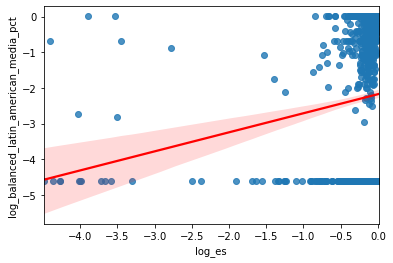

vars log_es and log_balanced_latin_american_media_pct have correl = 0.113 (p=1.213E-05)


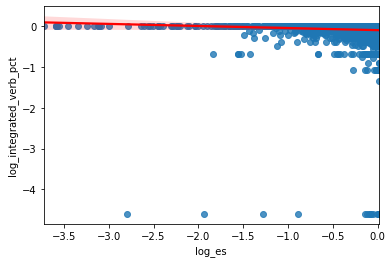

vars log_es and log_integrated_verb_pct have correl = -0.014 (p=1.084E-02)


/hg190/istewart6/miniconda3/envs/py3/lib/python3.6/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


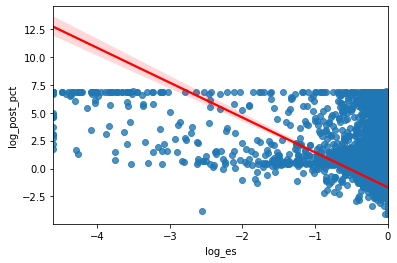

vars log_es and log_post_pct have correl = -0.341 (p=0.000E+00)


/hg190/istewart6/miniconda3/envs/py3/lib/python3.6/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


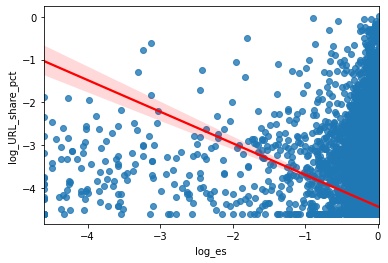

vars log_es and log_URL_share_pct have correl = -0.277 (p=0.000E+00)


/hg190/istewart6/miniconda3/envs/py3/lib/python3.6/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


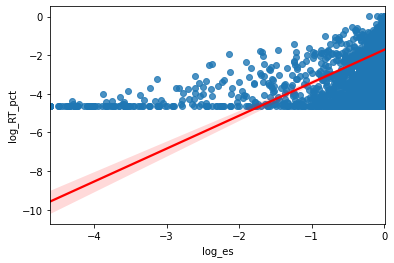

vars log_es and log_RT_pct have correl = 0.217 (p=0.000E+00)


In [13]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn
# let's check the correlation between the assumed variables
resid_vars = ['log_balanced_latin_american_media_pct', 'log_integrated_verb_pct', 'log_post_pct', 'log_URL_share_pct', 'log_RT_pct']
pred_var = 'log_es'
for resid_var in resid_vars:
    # linear fit
#     seaborn.regplot(loanword_post_social_data.loc[:, pred_var], loanword_post_social_data.loc[:, resid_var])
    # lowess fit
    valid_data = author_social_data[(author_social_data.loc[:, pred_var]!='')&
                                    (author_social_data.loc[:, resid_var]!='')]
    valid_data = valid_data.assign(**{
        pred_var : valid_data.loc[:, pred_var].astype(float),
        resid_var : valid_data.loc[:, resid_var].astype(float),
    })
    seaborn.regplot(valid_data.loc[:, pred_var], valid_data.loc[:, resid_var], lowess=True, line_kws={'color':'r'})
    plt.xlabel(pred_var)
    plt.ylabel(resid_var)
    plt.show()
    correl, p_val = pearsonr(valid_data.loc[:, pred_var], valid_data.loc[:, resid_var])
    print('vars %s and %s have correl = %.3f (p=%.3E)'%(pred_var, resid_var, correl, p_val))

OK! We find that higher Spanish use correlates with:
- more Latin American media
- less integrated verb use
- less URL/RT sharing

In [23]:
# simple model: compute residuals using linear regression
from sklearn.linear_model import LinearRegression
from statsmodels.nonparametric.smoothers_lowess import lowess
from sklearn.preprocessing import StandardScaler
import numpy as np
from scipy.optimize import curve_fit
def compute_residuals(data, X_var, Y_var, z_norm=False, fit_type='linear'):
    X = data.loc[:, [X_var]].values
    Y = data.loc[:, Y_var].values
    if(fit_type == 'linear'):
        reg = LinearRegression().fit(X, Y)
        pred = reg.predict(X)
        # compute residuals
    elif(fit_type == 'lowess'):
        lowess_frac = 0.8
        pred = lowess(X.reshape(1,-1)[0], Y, frac=lowess_frac, return_sorted=False)
    elif(fit_type == 'exp'):
        X_flat = X.reshape(1,-1)[0]
        exp_func = lambda x, a, b: a*np.exp(x*b)
        params = [1., 1.]
        opt_params, opt_cov = curve_fit(exp_func, X_flat, Y, p0=params)
        pred = exp_func(X_flat, opt_params[0], opt_params[1])
    resids = Y - pred
    if(z_norm):
        scaler = StandardScaler()
        resids = scaler.fit_transform(resids.reshape(-1,1))
    return resids

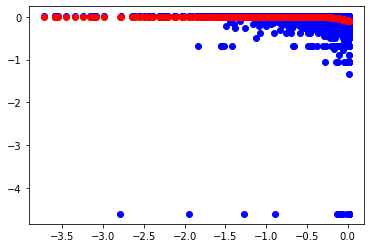

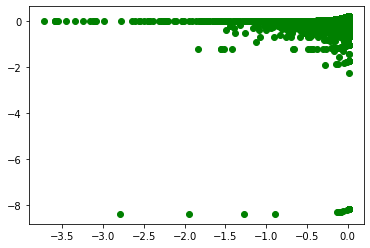

In [21]:
# sanity check does an exponential fit work?
from scipy.optimize import curve_fit
import numpy as np
from sklearn.preprocessing import StandardScaler
pred_var = 'log_es'
resid_var = 'log_integrated_verb_pct'
valid_data = author_social_data[(author_social_data.loc[:, pred_var]!='')& (author_social_data.loc[:, resid_var]!='')]
X = valid_data.loc[:, pred_var].astype(float).values
Y = valid_data.loc[:, resid_var].astype(float).values
params = [1., 1.] # 2 params
# params = [0., 0., 0.] # 3 params
quad_func = lambda x, a, b, c: a*x**2. + b*x + c
exp_func = lambda x, a, b: a*np.exp(x*b)
power_func = lambda x, a, b: a*np.power(x, b)
opt_params, _ = curve_fit(exp_func, X, Y, p0=params)
# opt_params, _ = curve_fit(power_func, X, Y, p0=params)
# opt_params, _ = curve_fit(quad_func, X, Y, p0=params)
pred = exp_func(X, opt_params[0], opt_params[1])
resids = Y - pred
scaler = StandardScaler()
resids = scaler.fit_transform(resids.reshape(-1,1))
plt.scatter(X, Y, color='b')
plt.scatter(X, pred, color='r')
plt.show()
plt.scatter(X, resids, color='g')
plt.show()

Let's fit the variables with three different functions and choose the one that reduces the correlation most effectively.

testing resid var log_balanced_latin_american_media_pct
testing fit linear


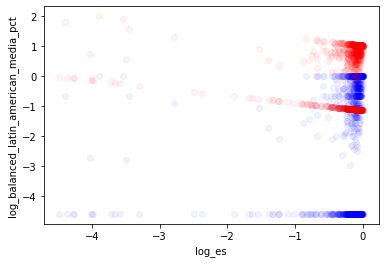

var log_es vs. log_balanced_latin_american_media_pct has residual correlation 0.000 (p=1.000E+00)
testing fit exp


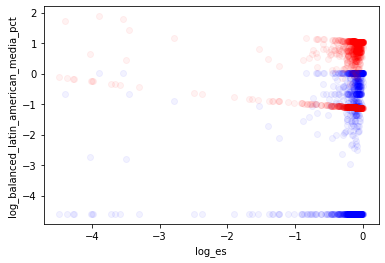

var log_es vs. log_balanced_latin_american_media_pct has residual correlation 0.018 (p=4.968E-01)
testing fit lowess


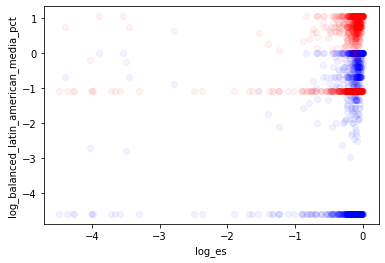

var log_es vs. log_balanced_latin_american_media_pct has residual correlation 0.113 (p=1.298E-05)
testing resid var log_integrated_verb_pct
testing fit linear


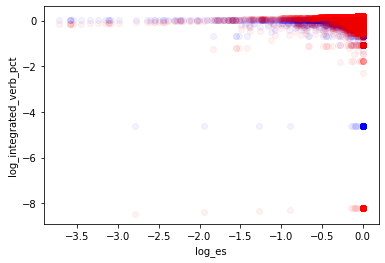

var log_es vs. log_integrated_verb_pct has residual correlation 0.000 (p=1.000E+00)
testing fit exp


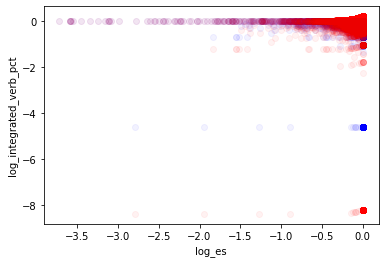

var log_es vs. log_integrated_verb_pct has residual correlation 0.020 (p=3.629E-04)
testing fit lowess


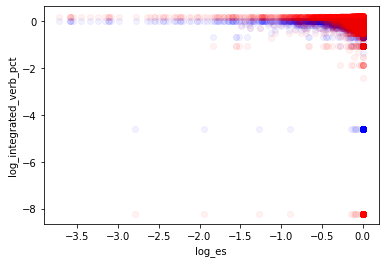

var log_es vs. log_integrated_verb_pct has residual correlation -0.018 (p=1.468E-03)
testing resid var log_post_pct
testing fit linear


/hg190/istewart6/miniconda3/envs/py3/lib/python3.6/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


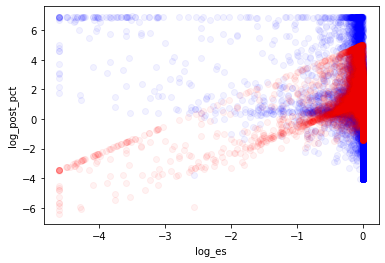

var log_es vs. log_post_pct has residual correlation -0.000 (p=1.000E+00)
testing fit exp
failed to fit resids because error Optimal parameters not found: Number of calls to function has reached maxfev = 600.
testing fit lowess


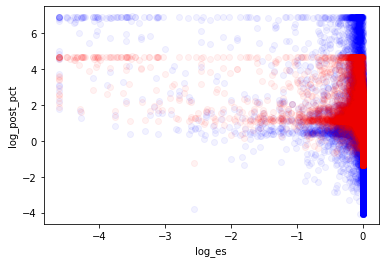

var log_es vs. log_post_pct has residual correlation -0.341 (p=0.000E+00)
testing resid var log_URL_share_pct
testing fit linear


/hg190/istewart6/miniconda3/envs/py3/lib/python3.6/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


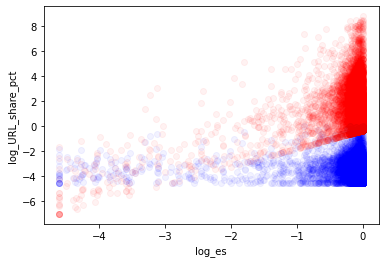

var log_es vs. log_URL_share_pct has residual correlation -0.000 (p=1.000E+00)
testing fit exp


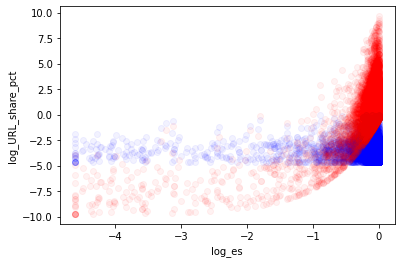

var log_es vs. log_URL_share_pct has residual correlation 0.417 (p=0.000E+00)
testing fit lowess


/nethome/istewart6/.local/lib/python3.6/site-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in true_divide
  res = _lowess(y, x, frac=frac, it=it, delta=delta)
/nethome/istewart6/.local/lib/python3.6/site-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)
/hg190/istewart6/miniconda3/envs/py3/lib/python3.6/site-packages/sklearn/utils/extmath.py:765: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/hg190/istewart6/miniconda3/envs/py3/lib/python3.6/site-packages/sklearn/utils/extmath.py:706: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)


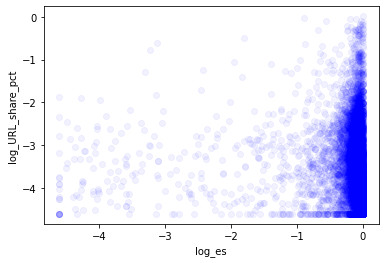

failed to fit resids because error array must not contain infs or NaNs
testing resid var log_RT_pct
testing fit linear


/hg190/istewart6/miniconda3/envs/py3/lib/python3.6/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


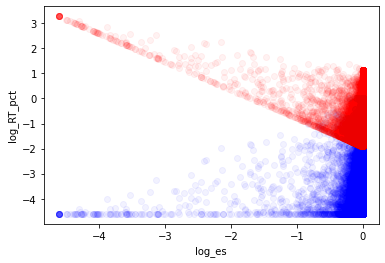

var log_es vs. log_RT_pct has residual correlation -0.000 (p=1.000E+00)
testing fit exp


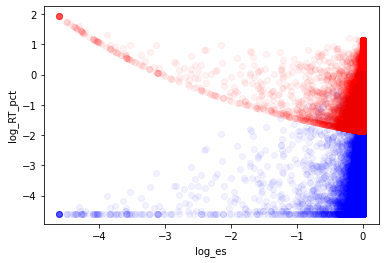

var log_es vs. log_RT_pct has residual correlation 0.091 (p=3.586E-126)
testing fit lowess


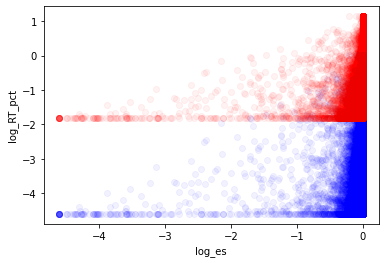

var log_es vs. log_RT_pct has residual correlation 0.217 (p=0.000E+00)


In [33]:
from scipy.stats import pearsonr
resid_vars = ['log_balanced_latin_american_media_pct', 'log_integrated_verb_pct', 'log_post_pct', 'log_URL_share_pct', 'log_RT_pct']
pred_var = 'log_es'
# fit_type = 'linear'
# fit_type = 'exp'
fit_type = 'lowess'
fit_types = ['linear', 'exp', 'lowess']
for resid_var in resid_vars:
    print('testing resid var %s'%(resid_var))
    # linear fit
#     seaborn.regplot(loanword_post_social_data.loc[:, pred_var], loanword_post_social_data.loc[:, resid_var])
    # lowess fit
    valid_data = author_social_data[(author_social_data.loc[:, pred_var]!='')&
                                    (author_social_data.loc[:, resid_var]!='')]
    valid_data = valid_data.assign(**{
        pred_var : valid_data.loc[:, pred_var].astype(float),
        resid_var : valid_data.loc[:, resid_var].astype(float),
    })
    for fit_type in fit_types:
        print(f'testing fit {fit_type}')
        try:
            resids = compute_residuals(valid_data, pred_var, resid_var, z_norm=True, fit_type=fit_type)
            plt.scatter(valid_data.loc[:, pred_var], valid_data.loc[:, resid_var], color='b', alpha=0.05)
            plt.scatter(valid_data.loc[:, pred_var], resids, color='r', alpha=0.05)
            plt.xlabel(pred_var)
            plt.ylabel(resid_var)
            plt.show()
            # check correlation
            correl, p_val = pearsonr(valid_data.loc[:, pred_var], resids[:, 0])
            print('var %s vs. %s has residual correlation %.3f (p=%.3E)'%(pred_var, resid_var, correl, p_val))
        except Exception as e:
            print('failed to fit resids because error %s'%(e))
    # for resid_var in resid_vars:
    #     loanword_post_social_data = loanword_post_social_data.assign(**{
    #         f'resid_{resid_var}' : compute_residuals(loanword_post_social_data, pred_var, resid_var, fit_type=fit_type)
    #     })
    # # native verbs
    # resid_vars = ['latin_american_media_pct']
    # for resid_var in resid_vars:
    #     native_verb_post_social_data = native_verb_post_social_data.assign(**{
    #         f'resid_{resid_var}' : compute_residuals(native_verb_post_social_data, pred_var, resid_var, fit_type=fit_type)
    #     })

What do we see?

- `media` residuals are best with `linear`
- `activity` residuals are best with `linear`
- `share` residuals are best fit with `linear`

Let's try using these residuals in some regressions!!

In [99]:
import sys
if('..' not in sys.path):
    sys.path.append('..')
from data_processing.data_helpers import bin_data_var
# recompute residuals for all authors, then join on regression data
pred_var = 'log_es'
NULL_VAL = ''
fit_type = 'linear'
for resid_var in resid_vars:
    print(resid_var)
    valid_idx = author_social_data[(author_social_data.loc[:, pred_var]!='')&(author_social_data.loc[:, resid_var]!='')].index
    valid_data = author_social_data.loc[valid_idx, :]
    valid_data = valid_data.assign(**{
        pred_var : valid_data.loc[:, pred_var].astype(float),
        resid_var : valid_data.loc[:, resid_var].astype(float),
    })
    resids = compute_residuals(valid_data, pred_var, resid_var, z_norm=True, fit_type=fit_type)
    resids = resids[:, 0]
    resids = pd.Series(resids, index=valid_idx)
    author_social_data = author_social_data.assign(**{
        f'resid_{resid_var}' : resids
    })
author_social_data.fillna('', inplace=True)
# re-bin media var
resid_var = 'resid_log_balanced_latin_american_media_pct'
bin_vals = author_social_data[author_social_data.loc[:, resid_var]!=''].loc[:, bin_var].values
bin_ranges = [np.percentile(bin_vals, 33), np.percentile(bin_vals, 66)]
bin_names = {0:'media_low', 1:'media_mid', 2:'media_high'}
author_social_data = bin_data_var(author_social_data, bin_ranges, bin_names, bin_var=resid_var)
bin_resid_var = f'{resid_var}_bin'
print(author_social_data.loc[:, bin_resid_var].value_counts())
# clean up scalar vars
resid_scalar_vars = ['log_integrated_verb_pct', 'log_post_pct', 'log_URL_share_pct', 'log_RT_pct']
for resid_scalar_var in resid_scalar_vars:
    author_social_data = author_social_data.assign(**{
        resid_scalar_var : author_social_data.loc[:, resid_scalar_var].apply(lambda x: float(x) if x !='' else x)
    })

log_balanced_latin_american_media_pct
log_integrated_verb_pct
log_post_pct


/hg190/istewart6/miniconda3/envs/py3/lib/python3.6/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


log_URL_share_pct


/hg190/istewart6/miniconda3/envs/py3/lib/python3.6/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


log_RT_pct


/hg190/istewart6/miniconda3/envs/py3/lib/python3.6/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


              81302
media_high      507
media_low       493
media_mid       492
Name: resid_log_balanced_latin_american_media_pct_bin, dtype: int64


How do these residuals do in prediction?

- Loanwords
- Native verbs

First, all vars.

In [123]:
## reload data
# loanwords
from importlib import reload
import model_helpers
reload(model_helpers)
from model_helpers import run_regularized_regression, load_clean_data
filter_vars=['es_bin', 'description_location_region', 'integrated_verb_pct', 'balanced_latin_american_media_pct']
scalar_vars = ['integrated_verb_pct', 'es', 'balanced_latin_american_media_pct', 'post_pct', 'URL_share_pct', 'RT_pct']
rare_control_vars = ['loanword', 'screen_name']
min_counts = [5,] * len(rare_control_vars)
loanword_post_social_data = load_clean_data('../../data/mined_tweets/loanword_verbs_post_social_data.tsv', filter_vars=filter_vars, scalar_vars=scalar_vars, rare_control_vars=rare_control_vars, min_counts=min_counts, data_type='loanword')
# add residuals!!
author_var = 'screen_name'
resid_vars = ['log_balanced_latin_american_media_pct', 'log_integrated_verb_pct', 'log_post_pct', 'log_URL_share_pct', 'log_RT_pct']
resid_cols = list(map(lambda x: f'resid_{x}', resid_vars)) + ['resid_log_balanced_latin_american_media_pct_bin']
combined_resid_data = author_social_data.loc[:, [author_var]+resid_cols]
loanword_post_social_data = pd.merge(loanword_post_social_data, combined_resid_data, on=author_var)
# fix scalar vars
resid_scalar_vars = ['resid_log_integrated_verb_pct', 'resid_log_post_pct', 'resid_log_URL_share_pct', 'resid_log_RT_pct']
for resid_scalar_var in resid_scalar_vars:
    loanword_post_social_data = loanword_post_social_data.assign(**{
        resid_scalar_var : loanword_post_social_data.loc[:, resid_scalar_var].astype(float)
    })

In [125]:
from importlib import reload
import model_helpers
reload(model_helpers)
from model_helpers import run_regularized_regression
dep_var = 'has_light_verb'
# scalar_vars = ['resid_log_integrated_verb_pct',]
scalar_vars = ['resid_log_integrated_verb_pct', 'resid_log_post_pct', 'resid_log_URL_share_pct', 'resid_log_RT_pct']
cat_vars = ['freq_loanword', 'freq_screen_name', 'es_bin', 'description_location_region', 'resid_log_balanced_latin_american_media_pct_bin']
# cat_vars = []
cat_var_treatment_lookup = {
    'freq_loanword' : 'RARE',
    'freq_screen_name' : 'RARE',
    'es_bin' : 'es_low',
    'description_location_region' : 'UNK',
    'resid_log_balanced_latin_american_media_pct_bin' : 'media_low',
}
model, model_results = run_regularized_regression(loanword_post_social_data, 
                                                  dep_var, scalar_vars=scalar_vars, 
                                                  cat_vars=cat_vars, 
                                                  cat_var_treatment_lookup=cat_var_treatment_lookup, 
                                                  l2_weight=0.1, max_iter=1000, verbose=False)
display(model_results.loc[list(filter(lambda x: 'freq_loanword' not in x and 'freq_screen_name' not in x, model_results.index.values)), :])

,mean,SE,Z,p,CI_lower,CI_upper
Intercept,-0.132077,0.389790,-0.338841,9.085929e-01,-0.896051,0.631897
"C(es_bin, Treatment(""es_low""))[T.es_high]",-0.097435,0.334714,-0.291099,9.324694e-01,-0.753462,0.558593
"C(es_bin, Treatment(""es_low""))[T.es_mid]",-0.060496,0.328740,-0.184023,9.729851e-01,-0.704815,0.583824
"C(description_location_region, Treatment(""UNK""))[T.europe]",0.004859,0.214563,0.022644,9.995909e-01,-0.415678,0.425395
"C(description_location_region, Treatment(""UNK""))[T.latin_america]",-0.040631,0.116100,-0.349962,9.025239e-01,-0.268182,0.186921
"C(description_location_region, Treatment(""UNK""))[T.other]",0.008018,0.461524,0.017372,9.997592e-01,-0.896553,0.912588
"C(description_location_region, Treatment(""UNK""))[T.us_america]",0.021188,0.281637,0.075230,9.954844e-01,-0.530812,0.573187
"C(resid_log_balanced_latin_american_media_pct_bin, Treatment(""media_low""))[T.media_high]",-0.028310,0.122780,-0.230576,9.576002e-01,-0.268954,0.212334
"C(resid_log_balanced_latin_american_media_pct_bin, Treatment(""media_low""))[T.media_mid]",-0.029964,0.129662,-0.231096,9.574090e-01,-0.284097,0.224168
resid_log_integrated_verb_pct,0.037187,0.339862,0.109417,9.904479e-01,-0.628931,0.703304


OK! As expected the only remaining effects are for URL sharing and RT sharing.

Check VIF: did we at least get rid of the collinearity?

In [126]:
from model_helpers import compute_VIF
test_vars = ['es_bin', 'description_location_region', 'resid_log_integrated_verb_pct', 'resid_log_balanced_latin_american_media_pct_bin']
for var_name in test_vars:
    var_params = list(filter(lambda x: var_name in x, model_results.index))
    for var_param in var_params:
        var_vif = compute_VIF(model, var_param)
        print('param={%s} has VIF=%.3f'%(var_param, var_vif))

param={C(es_bin, Treatment("es_low"))[T.es_high]} has VIF=14.468
param={C(es_bin, Treatment("es_low"))[T.es_mid]} has VIF=13.924
param={C(description_location_region, Treatment("UNK"))[T.europe]} has VIF=1.140
param={C(description_location_region, Treatment("UNK"))[T.latin_america]} has VIF=1.199
param={C(description_location_region, Treatment("UNK"))[T.other]} has VIF=1.044
param={C(description_location_region, Treatment("UNK"))[T.us_america]} has VIF=1.084
param={resid_log_integrated_verb_pct} has VIF=1.076
param={C(resid_log_balanced_latin_american_media_pct_bin, Treatment("media_low"))[T.media_high]} has VIF=1.386
param={C(resid_log_balanced_latin_american_media_pct_bin, Treatment("media_low"))[T.media_mid]} has VIF=1.531


Language still has high VIF, so we may not have actually addressed the problem.

Same thing but without the media variable.

In [141]:
## reload data
# loanwords
from importlib import reload
import model_helpers
reload(model_helpers)
from model_helpers import run_regularized_regression, load_clean_data
filter_vars=['es_bin', 'description_location_region', 'integrated_verb_pct']
scalar_vars = ['integrated_verb_pct', 'es', 'post_pct', 'URL_share_pct', 'RT_pct']
rare_control_vars = ['loanword', 'screen_name']
min_counts = [5,] * len(rare_control_vars)
loanword_post_social_data = load_clean_data('../../data/mined_tweets/loanword_verbs_post_social_data.tsv', filter_vars=filter_vars, scalar_vars=scalar_vars, rare_control_vars=rare_control_vars, min_counts=min_counts, data_type='loanword')
# add residuals!!
author_var = 'screen_name'
resid_vars = ['log_integrated_verb_pct', 'log_post_pct', 'log_URL_share_pct', 'log_RT_pct']
resid_cols = list(map(lambda x: f'resid_{x}', resid_vars))
combined_resid_data = author_social_data.loc[:, [author_var]+resid_cols]
loanword_post_social_data = pd.merge(loanword_post_social_data, combined_resid_data, on=author_var)
# fix scalar vars
for resid_col in resid_cols:
    loanword_post_social_data = loanword_post_social_data.assign(**{
        resid_col : loanword_post_social_data.loc[:, resid_col].astype(float)
    })
dep_var = 'has_light_verb'
scalar_vars = ['resid_log_integrated_verb_pct', 'resid_log_post_pct', 'resid_log_URL_share_pct', 'resid_log_RT_pct']
cat_vars = ['freq_loanword', 'freq_screen_name', 'es_bin', 'description_location_region']
# cat_vars = []
cat_var_treatment_lookup = {
    'freq_loanword' : 'RARE',
    'freq_screen_name' : 'RARE',
    'es_bin' : 'es_low',
    'description_location_region' : 'UNK',
}
model, model_results = run_regularized_regression(loanword_post_social_data, 
                                                  dep_var, scalar_vars=scalar_vars, 
                                                  cat_vars=cat_vars, 
                                                  cat_var_treatment_lookup=cat_var_treatment_lookup, 
                                                  l2_weight=0.1, max_iter=1000, verbose=False)
display(model_results.loc[list(filter(lambda x: 'freq_loanword' not in x and 'freq_screen_name' not in x, model_results.index.values)), :])
from model_helpers import compute_VIF
test_vars = ['es_bin', 'description_location_region', 'resid_log_integrated_verb_pct']
for var_name in test_vars:
    var_params = list(filter(lambda x: var_name in x, model_results.index))
    for var_param in var_params:
        var_vif = compute_VIF(model, var_param)
        print('param={%s} has VIF=%.3f'%(var_param, var_vif))

,mean,SE,Z,p,CI_lower,CI_upper
Intercept,-0.418304,0.366579,-1.141101,1.928782e-01,-1.136785,0.300178
"C(es_bin, Treatment(""es_low""))[T.es_high]",-0.407726,0.111491,-3.657027,0.000000e+00,-0.626245,-0.189208
"C(es_bin, Treatment(""es_low""))[T.es_mid]",-0.019682,0.116696,-0.168659,9.773066e-01,-0.248401,0.209038
"C(description_location_region, Treatment(""UNK""))[T.europe]",-0.050740,0.046029,-1.102342,2.243059e-01,-0.140955,0.039476
"C(description_location_region, Treatment(""UNK""))[T.latin_america]",-0.083723,0.025095,-3.336234,0.000000e+00,-0.132909,-0.034538
"C(description_location_region, Treatment(""UNK""))[T.other]",-0.004867,0.117528,-0.041409,9.986319e-01,-0.235217,0.225483
"C(description_location_region, Treatment(""UNK""))[T.us_america]",-0.014574,0.069848,-0.208657,9.652730e-01,-0.151475,0.122326
resid_log_integrated_verb_pct,-0.009277,0.011220,-0.826788,4.942414e-01,-0.031268,0.012715
resid_log_post_pct,0.033142,0.013838,2.395033,9.683506e-09,0.006020,0.060263
resid_log_URL_share_pct,0.089484,0.010595,8.445956,0.000000e+00,0.068718,0.110249


param={C(es_bin, Treatment("es_low"))[T.es_high]} has VIF=13.395
param={C(es_bin, Treatment("es_low"))[T.es_mid]} has VIF=13.688
param={C(description_location_region, Treatment("UNK"))[T.europe]} has VIF=1.271
param={C(description_location_region, Treatment("UNK"))[T.latin_america]} has VIF=1.174
param={C(description_location_region, Treatment("UNK"))[T.other]} has VIF=1.012
param={C(description_location_region, Treatment("UNK"))[T.us_america]} has VIF=1.049
param={resid_log_integrated_verb_pct} has VIF=1.009


OK! So the language VIF has actually increased, which may have to do with how we fit the residuals.

Let's run the same analysis on native verbs.

- no media var
- all vars

Predict native verb without media variable.

In [154]:
## reload data
# native_verbs
from model_helpers import run_regularized_regression, load_clean_data
filter_vars=['es_bin', 'description_location_region']
scalar_vars = ['es', 'post_pct', 'URL_share_pct', 'RT_pct']
rare_control_vars = ['native_word_type', 'screen_name']
min_counts = [5,50]
native_verb_post_social_data = load_clean_data('../../data/mined_tweets/native_verbs_post_social_data.tsv', 
                                               filter_vars=filter_vars, scalar_vars=scalar_vars, 
                                               rare_control_vars=rare_control_vars, 
                                               min_counts=min_counts, data_type='native_verb')
# add residuals!!
author_var = 'screen_name'
resid_vars = ['log_post_pct', 'log_URL_share_pct', 'log_RT_pct']
resid_cols = list(map(lambda x: f'resid_{x}', resid_vars))
combined_resid_data = author_social_data.loc[:, [author_var]+resid_cols]
native_verb_post_social_data = pd.merge(native_verb_post_social_data, combined_resid_data, on=author_var)
# fix scalar vars
for resid_col in resid_cols:
    native_verb_post_social_data = native_verb_post_social_data.assign(**{
        resid_col : native_verb_post_social_data.loc[:, resid_col].astype(float)
    })
dep_var = 'has_light_verb'
scalar_vars = ['resid_log_post_pct', 'resid_log_URL_share_pct', 'resid_log_RT_pct']
cat_vars = ['freq_native_word_type', 'freq_screen_name', 'es_bin', 'description_location_region']
cat_var_treatment_lookup = {
    'es_bin' : 'es_low',
    'description_location_region' : 'UNK',
}
rare_val = 'RARE'
fixed_effect_vars = ['freq_native_word_type', 'freq_screen_name']
for fixed_effect_var in fixed_effect_vars:
    if(rare_val not in native_verb_post_social_data.loc[:, fixed_effect_var].unique()):
        treatment_val = native_verb_post_social_data.loc[:, fixed_effect_var].value_counts().index[0]
    else:
        treatment_val = rare_val
    cat_var_treatment_lookup[fixed_effect_var] = treatment_val
display(model_results.loc[list(filter(lambda x: 'freq_native_word_type' not in x and 'freq_screen_name' not in x, model_results.index.values)), :])
from model_helpers import compute_VIF
test_vars = ['es_bin', 'description_location_region']
for var_name in test_vars:
    var_params = list(filter(lambda x: var_name in x, model_results.index))
    for var_param in var_params:
        var_vif = compute_VIF(model, var_param)
        print('param={%s} has VIF=%.3f'%(var_param, var_vif))

,mean,SE,Z,p,CI_lower,CI_upper
Intercept,-0.639004,0.055037,-11.610426,0.000000e+00,-0.746874,-0.531133
"C(es_bin, Treatment(""es_low""))[T.es_high]",-0.497910,0.053696,-9.272776,0.000000e+00,-0.603152,-0.392668
"C(es_bin, Treatment(""es_low""))[T.es_mid]",-0.128496,0.056121,-2.289635,1.584753e-07,-0.238491,-0.018501
"C(description_location_region, Treatment(""UNK""))[T.europe]",-0.037649,0.028376,-1.326806,7.833752e-02,-0.093265,0.017966
"C(description_location_region, Treatment(""UNK""))[T.latin_america]",-0.194235,0.015058,-12.899337,0.000000e+00,-0.223748,-0.164723
"C(description_location_region, Treatment(""UNK""))[T.other]",-0.005973,0.070833,-0.084324,9.943267e-01,-0.144803,0.132858
"C(description_location_region, Treatment(""UNK""))[T.us_america]",-0.017667,0.041844,-0.422202,8.585229e-01,-0.099680,0.064347
resid_log_post_pct,-0.366533,0.010127,-36.194319,0.000000e+00,-0.386381,-0.346685
resid_log_URL_share_pct,-0.211943,0.006304,-33.619800,0.000000e+00,-0.224299,-0.199587
resid_log_RT_pct,0.334266,0.009628,34.717153,0.000000e+00,0.315395,0.353137


param={C(es_bin, Treatment("es_low"))[T.es_high]} has VIF=28.445


KeyboardInterrupt: 

Predict native verb with media variable.

In [157]:
## reload data
# native_verbs
from importlib import reload
import model_helpers
reload(model_helpers)
from model_helpers import run_regularized_regression, load_clean_data
filter_vars=['es_bin', 'description_location_region', 'balanced_latin_american_media_pct_bin']
scalar_vars = ['es', 'post_pct', 'URL_share_pct', 'RT_pct']
rare_control_vars = ['native_word_type', 'screen_name']
min_counts = [5,50]
native_verb_post_social_data = load_clean_data('../../data/mined_tweets/native_verbs_post_social_data.tsv', 
                                               filter_vars=filter_vars, scalar_vars=scalar_vars, 
                                               rare_control_vars=rare_control_vars, 
                                               min_counts=min_counts, data_type='native_verb')
# add residuals!!
author_var = 'screen_name'
resid_vars = ['log_post_pct', 'log_URL_share_pct', 'log_RT_pct', 'log_balanced_latin_american_media_pct_bin']
resid_cols = list(map(lambda x: f'resid_{x}', resid_vars))
combined_resid_data = author_social_data.loc[:, [author_var]+resid_cols]
native_verb_post_social_data = pd.merge(native_verb_post_social_data, combined_resid_data, on=author_var)
# fix scalar vars
scalar_resid_cols = list(filter(lambda x: not x.endswith('_bin'), resid_cols))
for resid_col in scalar_resid_cols:
    native_verb_post_social_data = native_verb_post_social_data.assign(**{
        resid_col : native_verb_post_social_data.loc[:, resid_col].astype(float)
    })
dep_var = 'has_light_verb'
scalar_vars = ['resid_log_post_pct', 'resid_log_URL_share_pct', 'resid_log_RT_pct']
cat_vars = ['freq_native_word_type', 'freq_screen_name', 'es_bin', 'description_location_region', 'resid_log_balanced_latin_american_media_pct_bin']
# cat_vars = []
cat_var_treatment_lookup = {
    'es_bin' : 'es_low',
    'description_location_region' : 'UNK',
    'resid_log_balanced_latin_american_media_pct_bin' : 'media_low'
}
fixed_effect_vars = ['freq_native_word_type', 'freq_screen_name']
for fixed_effect_var in fixed_effect_vars:
    if(rare_val not in native_verb_post_social_data.loc[:, fixed_effect_var].unique()):
        treatment_val = native_verb_post_social_data.loc[:, fixed_effect_var].value_counts().index[0]
    else:
        treatment_val = rare_val
    cat_var_treatment_lookup[fixed_effect_var] = treatment_val
model, model_results = run_regularized_regression(native_verb_post_social_data, 
                                                  dep_var, scalar_vars=scalar_vars, 
                                                  cat_vars=cat_vars, 
                                                  cat_var_treatment_lookup=cat_var_treatment_lookup, 
                                                  l2_weight=0.1, max_iter=1000, verbose=False)
display(model_results.loc[list(filter(lambda x: 'freq_native_word_type' not in x and 'freq_screen_name' not in x, model_results.index.values)), :])
from model_helpers import compute_VIF
test_vars = ['es_bin', 'description_location_region', 'resid_log_balanced_latin_american_media_pct_bin']
for var_name in test_vars:
    var_params = list(filter(lambda x: var_name in x, model_results.index))
    for var_param in var_params:
        var_vif = compute_VIF(model, var_param)
        print('param={%s} has VIF=%.3f'%(var_param, var_vif))

,mean,SE,Z,p,CI_lower,CI_upper
Intercept,-0.401952,2.755344,-0.145881,0.983021,-5.802327,4.998424
"C(es_bin, Treatment(""es_low""))[T.es_high]",-0.236796,0.162990,-1.452826,0.034798,-0.556250,0.082658
"C(es_bin, Treatment(""es_low""))[T.es_mid]",-0.149967,0.158275,-0.947504,0.369311,-0.460180,0.160247
"C(description_location_region, Treatment(""UNK""))[T.europe]",-0.017217,0.104876,-0.164165,0.978499,-0.222771,0.188337
"C(description_location_region, Treatment(""UNK""))[T.latin_america]",-0.111308,0.052585,-2.116734,0.000007,-0.214372,-0.008244
"C(description_location_region, Treatment(""UNK""))[T.other]",-0.005225,0.202389,-0.025815,0.999468,-0.401899,0.391450
"C(description_location_region, Treatment(""UNK""))[T.us_america]",-0.014499,0.141362,-0.102563,0.991607,-0.291564,0.262566
"C(resid_log_balanced_latin_american_media_pct_bin, Treatment(""media_low""))[T.media_high]",-0.110159,0.055132,-1.998097,0.000065,-0.218216,-0.002102
"C(resid_log_balanced_latin_american_media_pct_bin, Treatment(""media_low""))[T.media_mid]",-0.121791,0.062934,-1.935200,0.000180,-0.245140,0.001558
resid_log_post_pct,-0.369826,0.042297,-8.743563,0.000000,-0.452726,-0.286926


param={C(es_bin, Treatment("es_low"))[T.es_high]} has VIF=27.937
param={C(es_bin, Treatment("es_low"))[T.es_mid]} has VIF=27.154
param={C(description_location_region, Treatment("UNK"))[T.europe]} has VIF=1.171
param={C(description_location_region, Treatment("UNK"))[T.latin_america]} has VIF=1.305
param={C(description_location_region, Treatment("UNK"))[T.other]} has VIF=1.018
param={C(description_location_region, Treatment("UNK"))[T.us_america]} has VIF=1.120
param={C(resid_log_balanced_latin_american_media_pct_bin, Treatment("media_low"))[T.media_high]} has VIF=1.498
param={C(resid_log_balanced_latin_american_media_pct_bin, Treatment("media_low"))[T.media_mid]} has VIF=1.657


### Compare variables versus residuals
We see that some variables (language use, integrated verb use) are likely correlated with language use, and we should try to see the effect of these variables on the dependent variable.

Let's compute the residuals from all variables except the "treatment" variables, then plot these treatment variable values against the residuals.

In [16]:
# integrated verb use
from importlib import reload
import model_helpers
reload(model_helpers)
from model_helpers import load_clean_data
filter_vars=['es_bin', 'description_location_region', 'integrated_verb_pct']
scalar_vars = ['log_integrated_verb_pct', 'es', 'log_post_pct', 'log_URL_share_pct', 'log_RT_pct']
rare_control_vars = ['loanword', 'screen_name']
min_counts = [5,] * len(rare_control_vars)
loanword_data_file = '../../data/mined_tweets/loanword_verbs_post_social_data.tsv'
loanword_post_social_data = load_clean_data(loanword_data_file, 
                                            filter_vars=filter_vars, scalar_vars=scalar_vars, 
                                            rare_control_vars=rare_control_vars, 
                                            min_counts=min_counts, data_type='loanword')

/hg190/istewart6/miniconda3/envs/py3/lib/python3.6/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [25]:
from model_helpers import run_regularized_regression
scalar_vars = ['log_post_pct', 'log_URL_share_pct', 'log_RT_pct']
cat_vars = ['freq_loanword', 'freq_screen_name', 'es_bin', 'description_location_region']
cat_var_treatment_lookup = {
    'es_bin' : 'es_low',
    'description_location_region' : 'UNK',
    'freq_loanword' : 'RARE',
    'freq_screen_name' : 'RARE',
}
dep_var = 'has_light_verb'
model, model_results = run_regularized_regression(loanword_post_social_data, 
                                                  dep_var, scalar_vars=scalar_vars, 
                                                  cat_vars=cat_vars, 
                                                  cat_var_treatment_lookup=cat_var_treatment_lookup, 
                                                  l2_weight=0.1, max_iter=1000, verbose=False)

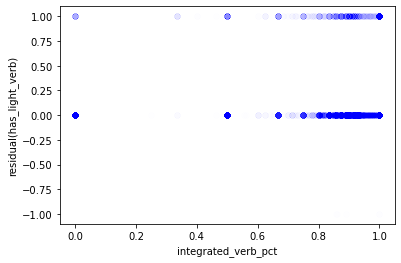

In [38]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
dep_var = 'has_light_verb'
dep_var_pred = (model.model.predict(model.params, exog=model.model.exog) > 0.5).astype(int) # discrete prediction
# dep_var_pred = model.model.predict(model.params, exog=model.model.exog) # predict probability [0,1]
dep_var_true = loanword_post_social_data.loc[:, dep_var]
resids = dep_var_true - dep_var_pred
# plot independent variable vs. residual
treat_var = 'integrated_verb_pct'
plt.scatter(loanword_post_social_data.loc[:, treat_var], resids, alpha=0.005, color='b')
plt.xlabel(treat_var)
plt.ylabel(f'residual({dep_var})')
plt.show()

Slight tendency toward more false positives with higher integrated verb use, which means that low to mid-range integrated verb use is better predictor? 
More integrated verbs should mean less light verb which should mean that higher integrated verb use is more likely to predict 0, which seems correct.

We can bin this and do an actual frequency check!

In [60]:
from scipy.stats import chi2_contingency
import numpy as np
import pandas as pd
bin_count = 3
treat_var = 'integrated_verb_pct'
# treat_var_bins = [0.,
#                   np.percentile(loanword_post_social_data.loc[:, treat_var], 10), 
#                   np.percentile(loanword_post_social_data.loc[:, treat_var], 25),]
treat_var_bins = [0., 0.5, 0.99, 1.]
bin_vals = pd.cut(loanword_post_social_data.loc[:, treat_var], bins=treat_var_bins)
print(bin_vals.value_counts())
resid_bin_counts = pd.crosstab(resids, bin_vals)
# normalize
resid_bin_counts_norm = resid_bin_counts / resid_bin_counts.sum(axis=0)
print(resid_bin_counts)
print(resid_bin_counts_norm)
test_stat, p_val, dof, expected = chi2_contingency(resid_bin_counts)
print('difference with test stat = %.3f (p=%.3E)'%(test_stat, p_val))

(0.99, 1.0]    21832
(0.5, 0.99]     5856
(0.0, 0.5]       412
Name: integrated_verb_pct, dtype: int64
integrated_verb_pct  (0.0, 0.5]  (0.5, 0.99]  (0.99, 1.0]
has_light_verb                                           
-1                            0            3            2
 0                          264         4422        16419
 1                          148         1431         5411
integrated_verb_pct  (0.0, 0.5]  (0.5, 0.99]  (0.99, 1.0]
has_light_verb                                           
-1                     0.000000     0.000512     0.000092
 0                     0.640777     0.755123     0.752061
 1                     0.359223     0.244365     0.247847
difference with test stat = 32.234 (p=1.713E-06)


Authors with lower integrated verb use tend to over-predict light verbs (from their other relevant variables), which means that the lower integrated verb use authors tend to use fewer light verbs than expected by the model. This makes sense given that we saw a positive correlation with prior integrated verb use and light verb use.

Same thing but with the media variable.

In [61]:
# integrated verb use
from importlib import reload
import model_helpers
reload(model_helpers)
from model_helpers import load_clean_data
filter_vars=['es_bin', 'description_location_region', 'integrated_verb_pct', 'balanced_latin_american_media_pct']
scalar_vars = ['log_integrated_verb_pct', 'log_balanced_latin_american_media_pct', 'log_es', 'log_post_pct', 'log_URL_share_pct', 'log_RT_pct']
rare_control_vars = ['loanword', 'screen_name']
min_counts = [5,] * len(rare_control_vars)
loanword_data_file = '../../data/mined_tweets/loanword_verbs_post_social_data.tsv'
loanword_post_social_data = load_clean_data(loanword_data_file, 
                                            filter_vars=filter_vars, scalar_vars=scalar_vars, 
                                            rare_control_vars=rare_control_vars, 
                                            min_counts=min_counts, data_type='loanword')

/hg190/istewart6/miniconda3/envs/py3/lib/python3.6/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [62]:
from model_helpers import run_regularized_regression
scalar_vars = ['log_post_pct', 'log_URL_share_pct', 'log_RT_pct', 'log_integrated_verb_pct']
cat_vars = ['freq_loanword', 'freq_screen_name', 'es_bin', 'description_location_region']
cat_var_treatment_lookup = {
    'es_bin' : 'es_low',
    'description_location_region' : 'UNK',
    'freq_loanword' : 'RARE',
    'freq_screen_name' : 'RARE',
}
dep_var = 'has_light_verb'
model, model_results = run_regularized_regression(loanword_post_social_data, 
                                                  dep_var, scalar_vars=scalar_vars, 
                                                  cat_vars=cat_vars, 
                                                  cat_var_treatment_lookup=cat_var_treatment_lookup, 
                                                  l2_weight=0.1, max_iter=1000, verbose=False)

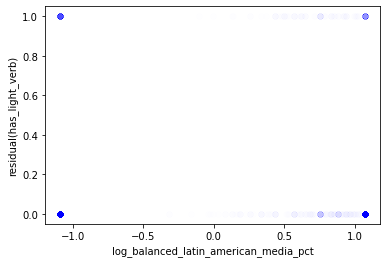

In [69]:
dep_var = 'has_light_verb'
dep_var_pred = (model.model.predict(model.params, exog=model.model.exog) > 0.5).astype(int) # discrete prediction
dep_var_true = loanword_post_social_data.loc[:, dep_var]
resids = dep_var_true - dep_var_pred
# plot independent variable vs. residual
treat_var = 'log_balanced_latin_american_media_pct'
plt.scatter(loanword_post_social_data.loc[:, treat_var], resids, alpha=0.005, color='b')
plt.xlabel(treat_var)
plt.ylabel(f'residual({dep_var})')
plt.show()

This looks like we're overpredicting light verbs for lower media authors. Let's verify this with bins.

In [67]:
bin_vals = loanword_post_social_data.loc[:, 'balanced_latin_american_media_pct_bin']
resid_bin_counts = pd.crosstab(resids, bin_vals)
# normalize
resid_bin_counts_norm = resid_bin_counts / resid_bin_counts.sum(axis=0)
print(resid_bin_counts)
print(resid_bin_counts_norm)
test_stat, p_val, dof, expected = chi2_contingency(resid_bin_counts)
print('difference with test stat = %.3f (p=%.3E)'%(test_stat, p_val))

balanced_latin_american_media_pct_bin  media_high  media_low  media_mid
has_light_verb                                                         
0                                             259        454        207
1                                             110        196         80
balanced_latin_american_media_pct_bin  media_high  media_low  media_mid
has_light_verb                                                         
0                                        0.701897   0.698462   0.721254
1                                        0.298103   0.301538   0.278746
difference with test stat = 0.513 (p=7.738E-01)


Great. No significant or even slight difference in the residual distribution, although slightly fewer false positives among high media authors.

Same thing but with native verbs.

/hg190/istewart6/miniconda3/envs/py3/lib/python3.6/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,mean,SE,Z,p,CI_lower,CI_upper
Intercept,-0.897410,1.846549,-0.485993,0.813286,-4.516580,2.721760
"C(es_bin, Treatment(""es_low""))[T.es_high]",-0.034601,0.210555,-0.164333,0.978455,-0.447282,0.378080
"C(es_bin, Treatment(""es_low""))[T.es_mid]",-0.843196,0.125904,-6.697131,0.000000,-1.089964,-0.596429
"C(description_location_region, Treatment(""UNK""))[T.europe]",-0.051191,0.079139,-0.646851,0.675643,-0.206301,0.103918
"C(description_location_region, Treatment(""UNK""))[T.latin_america]",-0.250960,0.041357,-6.068075,0.000000,-0.332019,-0.169901
"C(description_location_region, Treatment(""UNK""))[T.other]",-0.010902,0.159169,-0.068495,0.996257,-0.322867,0.301063
"C(description_location_region, Treatment(""UNK""))[T.us_america]",-0.026848,0.109951,-0.244181,0.952455,-0.242349,0.188653
log_post_pct,0.012632,0.019699,0.641264,0.680912,-0.025977,0.051242
log_URL_share_pct,0.008908,0.018886,0.471688,0.823933,-0.028108,0.045924
log_RT_pct,-0.002486,0.019208,-0.129451,0.986630,-0.040133,0.035160


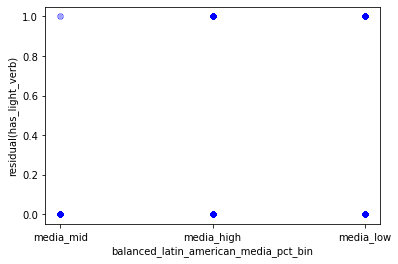

In [123]:
# integrated verb use
from importlib import reload
import model_helpers
reload(model_helpers)
from model_helpers import load_clean_data
filter_vars=['es_bin', 'description_location_region', 'balanced_latin_american_media_pct_bin']
scalar_vars = ['es', 'log_post_pct', 'log_URL_share_pct', 'log_RT_pct']
rare_control_vars = ['native_word_type', 'screen_name']
min_counts = [5, 50]
native_verb_data_file = '../../data/mined_tweets/native_verbs_post_social_data.tsv'
native_verb_post_social_data = load_clean_data(native_verb_data_file, 
                                               filter_vars=filter_vars, scalar_vars=scalar_vars, 
                                               rare_control_vars=rare_control_vars, 
                                               min_counts=min_counts, data_type='native_verb')
from model_helpers import run_regularized_regression
scalar_vars = ['log_post_pct', 'log_URL_share_pct', 'log_RT_pct']
cat_vars = ['freq_native_word_type', 'freq_screen_name', 'es_bin', 'description_location_region']
cat_var_treatment_lookup = {
    'es_bin' : 'es_low',
    'description_location_region' : 'UNK',
    'freq_native_word_type' : 'RARE',
    'freq_screen_name' : 'RARE',
    'balanced_latin_american_media_pct_bin' : 'media_low',
}
dep_var = 'has_light_verb'
model, model_results = run_regularized_regression(native_verb_post_social_data, 
                                                  dep_var, scalar_vars=scalar_vars, 
                                                  cat_vars=cat_vars, 
                                                  cat_var_treatment_lookup=cat_var_treatment_lookup, 
                                                  l2_weight=0.1, max_iter=1000, verbose=False)
clean_model_results = model_results.loc[list(filter(lambda x: 'freq_native_word_type' not in x and 'freq_screen_name' not in x, model_results.index)), :]
display(clean_model_results)
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
dep_var = 'has_light_verb'
dep_var_pred = (model.model.predict(model.params, exog=model.model.exog) > 0.5).astype(int) # discrete prediction
# dep_var_pred = model.model.predict(model.params, exog=model.model.exog) # predict probability [0,1]
dep_var_true = native_verb_post_social_data.loc[:, dep_var]
resids = dep_var_true - dep_var_pred
# plot independent variable vs. residual
treat_var = 'balanced_latin_american_media_pct_bin'
plt.scatter(native_verb_post_social_data.loc[:, treat_var], resids, alpha=0.005, color='b')
plt.xlabel(treat_var)
plt.ylabel(f'residual({dep_var})')
plt.show()

Are the residuals evenly distributed among media vals?

In [124]:
from scipy.stats import chi2_contingency
bin_vals = native_verb_post_social_data.loc[:, 'balanced_latin_american_media_pct_bin']
resid_bin_counts = pd.crosstab(resids, bin_vals)
# normalize
resid_bin_counts_norm = resid_bin_counts / resid_bin_counts.sum(axis=0)
print(resid_bin_counts)
print(resid_bin_counts_norm)
test_stat, p_val, dof, expected = chi2_contingency(resid_bin_counts)
print('difference with test stat = %.3f (p=%.3E)'%(test_stat, p_val))

balanced_latin_american_media_pct_bin  media_high  media_low  media_mid
has_light_verb                                                         
0                                           11987      11672       2290
1                                             552        508         93
balanced_latin_american_media_pct_bin  media_high  media_low  media_mid
has_light_verb                                                         
0                                        0.955977   0.958292   0.960974
1                                        0.044023   0.041708   0.039026
difference with test stat = 1.606 (p=4.480E-01)


Nope! So this means that the media effect (negative) is not due to a data imbalance.

### Fit dependent var residuals
Instead of fitting the treatment variable as a function of the control variable, let's first predict the dependent variable with all variables except the treatment variable, then predict the residuals from that regression using the treatment variable.

- light verb ~ f(language + location + verb use)
- resids = light verb - f(...)
- resids ~ media share

In [1]:
## reload data
# loanword data first, all variables
from model_helpers import load_clean_data
filter_vars=['es_bin', 'description_location_region', 'integrated_verb_pct', 'latin_american_media_pct']
scalar_vars = ['integrated_verb_pct', 'es', 'latin_american_media_pct']
rare_control_vars = ['loanword', 'screen_name']
loanword_post_social_data = load_clean_data('../../data/mined_tweets/loanword_verbs_post_social_data.tsv', filter_vars=filter_vars, scalar_vars=scalar_vars, rare_control_vars=rare_control_vars, data_type='loanword')
scalar_vars = ['es', 'latin_american_media_pct']
rare_control_vars = ['native_word_type', 'screen_name']
native_verb_post_social_data = load_clean_data('../../data/mined_tweets/native_verbs_post_social_data.tsv', filter_vars=filter_vars, scalar_vars=scalar_vars, rare_control_vars=rare_control_vars, data_type='native_verb')

/nethome/istewart6/.local/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/hg190/istewart6/miniconda3/envs/py3/lib/python3.6/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [63]:
# loanwords
import pandas as pd
from model_helpers import run_regularized_regression
from statsmodels.genmod.families.family import Gaussian, Binomial
from statsmodels.genmod.families.links import logit
from statsmodels.api import GLM
from sklearn.svm import SVR
dep_var = 'has_light_verb'
# cat_vars = ['freq_loanword', 'freq_screen_name', 'es_bin', 'description_location_region']
# cat_var_treatment_vals = ['RARE', 'RARE', 'es_low', 'other']
# scalar_vars = ['integrated_verb_pct']
# treat prediction as linear prediction
# logistic regression
# model, model_results = run_regularized_regression(loanword_post_social_data, dep_var, scalar_vars=scalar_vars, cat_vars=cat_vars, cat_var_treatment_vals=cat_var_treatment_vals, l2_weight=0.1, max_iter=1000, verbose=False)
# linear prediction
scalar_vars = ['es', 'integrated_verb_pct']
cat_vars = ['description_location_region', 'freq_loanword', 'freq_screen_name']
reg_data = []
for cat_var in cat_vars:
    dummy_vals = pd.get_dummies(loanword_post_social_data.loc[:, cat_var])
    reg_data.append(dummy_vals)
if(len(reg_data) > 0):
    reg_data = pd.concat(reg_data, axis=1)
else:
    reg_data = pd.DataFrame()
reg_data = pd.concat([reg_data, loanword_post_social_data.loc[:, scalar_vars]], axis=1)
Y = loanword_post_social_data.loc[:, dep_var]
# SVR => not good
# linear_model = SVR(kernel='rbf')
# linear_model.fit(reg_data, Y)
# elastic net => same as before, reduces (?) effect of categorical variables
linear_model = GLM(Y.values.reshape(-1,1), reg_data, family=Binomial(logit()))
model_results = model.fit_regularized(method='elastic_net', alpha=0.1, L1_wt=0.)
pred = model_results.predict(reg_data)
resids = Y - pred
# compute resids
# resids = loanword_post_social_data.loc[:, dep_var].values - model.fittedvalues
# compute error
error = (sum(resids**2.)/len(resids))**.5
print('RMSE=%.3E'%(error))

RMSE=4.495E-01


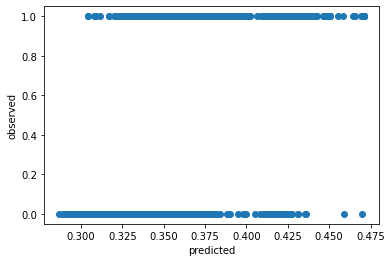

In [64]:
# is model at all accurate?
plt.scatter(pred, Y)
plt.xlabel('predicted')
plt.ylabel('observed')
plt.show()

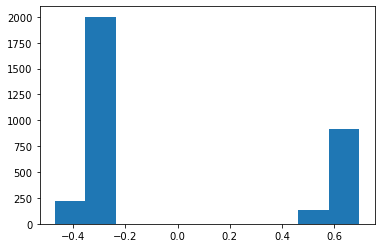

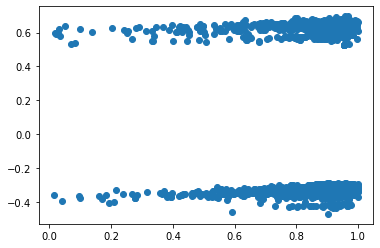

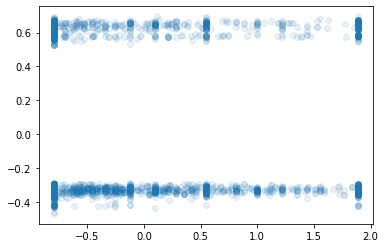

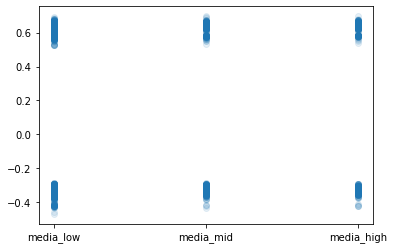

In [65]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
# are residuals normally distributed?
plt.hist(resids)
plt.show()
# are residuals correlated with main predictor (language)?
plt.scatter(loanword_post_social_data.loc[:, 'es'], resids)
plt.show()
# are residuals correlated with he treatment variable (media)?
plt.scatter(loanword_post_social_data.loc[:, 'log_latin_american_media_pct'], resids, alpha=0.1)
plt.show()
# are residuals correlated with different bins?
plt.scatter(loanword_post_social_data.loc[:, 'latin_american_media_pct_bin'], resids, alpha=0.1)
plt.show()

OK! This will not be a quick fix.

Let's try the same regression model to fit this distribution.

In [66]:
linear_model = SVR(kernel='rbf')
treat_var = 'latin_american_media_pct'
linear_model.fit(loanword_post_social_data.loc[:, [treat_var]], resids)
pred = linear_model.predict(loanword_post_social_data.loc[:, [treat_var]])
error = (sum((resids - pred)**2.)/len(Y))**.5
print('RMSE=%3E'%(error))

RMSE=4.949784E-01


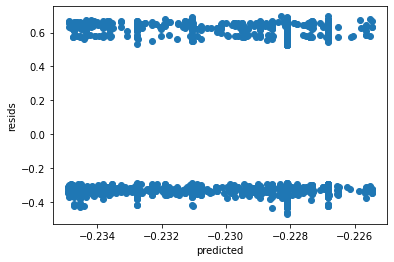

In [67]:
# how good is the fit?
plt.scatter(pred, resids)
plt.xlabel('predicted')
plt.ylabel('resids')
plt.show()

Overall, it seems that we are having trouble getting even OK performance using either the SVM or GLM model.

### Fix collinearity: partial least squares regression
In partial least squares regression, 